# Find a suiting epsilon

The goal of this notebook is to derive a suitable magnitude of the attack for each feature.

In [1]:
#import uproot
import uproot4 as uproot
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
#import seaborn as sns
import mplhep as hep

In [2]:
import awkward1 as ak

In [3]:
uproot.__version__

'0.1.2'

## Checking files content

Focusing on ntuple_merged_42

In [4]:
inputs_root = "/eos/cms/store/group/phys_btag/ParT_Run3/Merged_Puppi_v1/ntuple_merged_42.root:deepntuplizer/tree"

In [5]:
file_ = uproot.open(inputs_root)
columns_ = file_.keys()

In [6]:
columns_

['n_sv',
 'nsv',
 'sv_pt',
 'sv_eta',
 'sv_phi',
 'sv_e',
 'sv_etarel',
 'sv_phirel',
 'sv_deltaR',
 'sv_mass',
 'sv_ntracks',
 'sv_chi2',
 'sv_ndf',
 'sv_normchi2',
 'sv_dxy',
 'sv_dxyerr',
 'sv_dxysig',
 'sv_d3d',
 'sv_d3derr',
 'sv_d3dsig',
 'sv_costhetasvpv',
 'sv_enratio',
 'n_gtracks',
 'nGtracks',
 'gtrack_pt',
 'gtrack_eta',
 'gtrack_phi',
 'gtrack_mass',
 'gtrack_dz',
 'gtrack_dxy',
 'gtrack_3D_ip',
 'gtrack_3D_sip',
 'gtrack_2D_ip',
 'gtrack_2D_sip',
 'gtrack_dR',
 'gtrack_dist_neigh',
 'gtrack_3D_TrackProbability',
 'gtrack_2D_TrackProbability',
 'gtrack_chi2reduced',
 'gtrack_nPixelHits',
 'gtrack_nHits',
 'gtrack_jetAxisDistance',
 'gtrack_jetAxisDlength',
 'gtrack_PCAtrackFromPV',
 'gtrack_dotProdTrack',
 'gtrack_dotProdTrack2D',
 'n_layers',
 'r004',
 'r006',
 'r008',
 'r010',
 'r016',
 'rvar',
 'rvwt',
 'npv',
 'rho',
 'ntrueInt',
 'event_no',
 'jet_no',
 'gen_pt',
 'Delta_gen_pt',
 'isB',
 'isGBB',
 'isBB',
 'isLeptonicB',
 'isLeptonicB_C',
 'isC',
 'isGCC',
 'isCC',
 

In [7]:
global_branches = ['jet_pt',
                   'jet_eta',
                   'nCpfcand',
                   'nNpfcand',
                   'nsv',
                   'npv',
                   'TagVarCSV_trackSumJetEtRatio',
                   'TagVarCSV_trackSumJetDeltaR',
                   'TagVarCSV_vertexCategory',
                   'TagVarCSV_trackSip2dValAboveCharm',
                   'TagVarCSV_trackSip2dSigAboveCharm',
                   'TagVarCSV_trackSip3dValAboveCharm',
                   'TagVarCSV_trackSip3dSigAboveCharm',
                   'TagVarCSV_jetNSelectedTracks',
                   'TagVarCSV_jetNTracksEtaRel']
cpf_branches = ['Cpfcan_BtagPf_trackEtaRel',
                'Cpfcan_BtagPf_trackPtRel',
                'Cpfcan_BtagPf_trackPPar',
                'Cpfcan_BtagPf_trackDeltaR',
                'Cpfcan_BtagPf_trackPParRatio',
                'Cpfcan_BtagPf_trackSip2dVal',
                'Cpfcan_BtagPf_trackSip2dSig',
                'Cpfcan_BtagPf_trackSip3dVal',
                'Cpfcan_BtagPf_trackSip3dSig',
                'Cpfcan_BtagPf_trackJetDistVal',
                'Cpfcan_ptrel',
                'Cpfcan_drminsv',
                #'Cpfcan_distminsv',
                'Cpfcan_VTX_ass',
                'Cpfcan_puppiw',
                'Cpfcan_chi2',
                'Cpfcan_quality']
npf_branches = ['Npfcan_ptrel',
                'Npfcan_etarel',
                'Npfcan_phirel', 
                'Npfcan_deltaR',
                'Npfcan_isGamma',
                'Npfcan_HadFrac',
                'Npfcan_drminsv',
                'Npfcan_puppiw']
vtx_branches = ['sv_pt',
                'sv_deltaR',
                'sv_mass',
                'sv_etarel',
                'sv_phirel',
                'sv_ntracks',
                'sv_chi2',
                'sv_normchi2',
                'sv_dxy',
                'sv_dxysig',
                'sv_d3d',
                'sv_d3dsig',
                'sv_costhetasvpv',
                'sv_enratio']
cpf_pts_branches = ['Cpfcan_pt',
                    'Cpfcan_eta',
                    'Cpfcan_phi',
                    'Cpfcan_e']
npf_pts_branches = ['Npfcan_pt',
                    'Npfcan_eta',
                    'Npfcan_phi',
                    'Npfcan_e']
vtx_pts_branches = ['sv_pt',
                    'sv_eta',
                    'sv_phi',
                    'sv_e']

In [8]:
df_glob = file_.arrays(global_branches, library="ak")

In [9]:
df_cpf = file_.arrays(cpf_branches, library="ak")

In [10]:
df_npf = file_.arrays(npf_branches, library="ak")

In [11]:
df_vtx = file_.arrays(vtx_branches, library="ak")

In [12]:
df_cpf_pts = file_.arrays(cpf_pts_branches, library="ak")

In [13]:
df_npf_pts = file_.arrays(npf_pts_branches, library="ak")

In [14]:
df_vtx_pts = file_.arrays(vtx_pts_branches, library="ak")

In [15]:
hflav = file_.arrays('jet_hflav', library="ak")['jet_hflav']

In [16]:
ak.min(ak.flatten(df_npf_pts['Npfcan_e']))

0.9501963

In [17]:
ak.min(ak.num(df_npf_pts['Npfcan_e']))

0

(array([1.00000e+01, 1.40000e+01, 8.00000e+00, 1.50000e+01, 9.00000e+00,
        1.30000e+01, 1.70000e+01, 1.80000e+01, 8.00000e+00, 2.00000e+01,
        9.00000e+00, 2.90000e+01, 1.90000e+01, 4.40000e+01, 2.40000e+01,
        4.80000e+01, 5.20000e+01, 4.40000e+01, 5.60000e+01, 4.10000e+01,
        5.60000e+01, 6.00000e+01, 8.60000e+01, 6.60000e+01, 1.06000e+02,
        8.20000e+01, 1.33000e+02, 8.30000e+01, 1.42000e+02, 1.14000e+02,
        1.73000e+02, 1.21000e+02, 2.20000e+02, 2.34000e+02, 1.43000e+02,
        2.52000e+02, 1.79000e+02, 2.38000e+02, 1.96000e+02, 3.10000e+02,
        2.36000e+02, 3.65000e+02, 2.27000e+02, 4.01000e+02, 2.88000e+02,
        4.46000e+02, 2.97000e+02, 5.22000e+02, 3.56000e+02, 6.05000e+02,
        6.51000e+02, 4.15000e+02, 7.48000e+02, 4.78000e+02, 8.40000e+02,
        5.80000e+02, 8.51000e+02, 5.95000e+02, 1.00800e+03, 6.79000e+02,
        1.02800e+03, 7.10000e+02, 1.16600e+03, 8.93000e+02, 1.30300e+03,
        9.55000e+02, 1.45000e+03, 1.64700e+03, 1.10

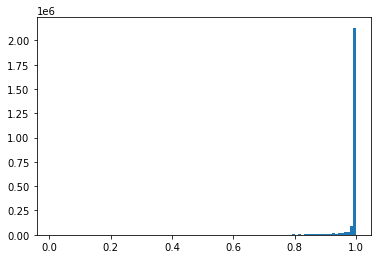

In [22]:
plt.hist(ak.flatten(df_npf['Npfcan_puppiw']),bins=100)

(array([1.000000e+00, 0.000000e+00, 2.000000e+00, 4.000000e+00,
        5.000000e+00, 9.000000e+00, 5.000000e+00, 1.000000e+01,
        1.000000e+01, 1.200000e+01, 8.000000e+00, 2.400000e+01,
        1.600000e+01, 2.300000e+01, 1.500000e+01, 3.400000e+01,
        3.300000e+01, 5.100000e+01, 4.000000e+01, 4.900000e+01,
        3.700000e+01, 6.400000e+01, 4.600000e+01, 7.900000e+01,
        5.900000e+01, 9.100000e+01, 5.500000e+01, 9.200000e+01,
        7.200000e+01, 1.010000e+02, 8.500000e+01, 1.550000e+02,
        1.130000e+02, 1.640000e+02, 1.260000e+02, 1.740000e+02,
        1.090000e+02, 2.230000e+02, 1.480000e+02, 2.730000e+02,
        1.780000e+02, 2.730000e+02, 2.110000e+02, 3.450000e+02,
        2.210000e+02, 3.630000e+02, 2.380000e+02, 4.010000e+02,
        2.810000e+02, 4.370000e+02, 5.210000e+02, 3.600000e+02,
        5.580000e+02, 3.770000e+02, 5.910000e+02, 4.250000e+02,
        6.730000e+02, 5.180000e+02, 7.550000e+02, 5.570000e+02,
        8.140000e+02, 6.040000e+02, 9.06

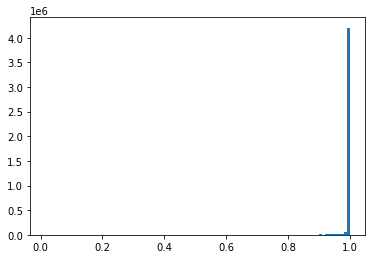

In [24]:
plt.hist(ak.flatten(df_cpf['Cpfcan_puppiw']),bins=100)

In [18]:
hflav

<Array [5, 4, 0, 0, 0, 0, ... 0, 5, 0, 0, 0, 0] type='400000 * int32'>

In [17]:
df_glob

<Array [{jet_pt: 156, ... ] type='400000 * {"jet_pt": float32, "jet_eta": float3...'>

In [18]:
ak.sum(df_glob.nNpfcand == 0)

13711

In [19]:
df_glob.nNpfcand[:5]

<Array [10, 8, 5, 15, 19] type='5 * float32'>

In [20]:
df_glob.nsv[:5]

<Array [2, 1, 1, 1, 2] type='5 * float32'>

In [21]:
df_cpf

<Array [{Cpfcan_BtagPf_trackEtaRel: [, ... ] type='400000 * {"Cpfcan_BtagPf_trac...'>

In [22]:
df_npf

<Array [{Npfcan_ptrel: [-0.797, ... 0.976]}] type='400000 * {"Npfcan_ptrel": var...'>

In [23]:
ak.sum(ak.num(df_npf.Npfcan_ptrel[:]) == df_glob.nNpfcand[:])

400000

In [24]:
df_vtx

<Array [{sv_pt: [40.9, ... sv_enratio: []}] type='400000 * {"sv_pt": var * float...'>

In [25]:
df_cpf_pts

<Array [{Cpfcan_pt: [1.26, 1.34, ... 6.44]}] type='400000 * {"Cpfcan_pt": var * ...'>

In [26]:
df_npf_pts

<Array [{Npfcan_pt: [31.6, 3.91, ... 1.86]}] type='400000 * {"Npfcan_pt": var * ...'>

In [27]:
df_vtx_pts

<Array [{sv_pt: [40.9, 6.99], ... sv_e: []}] type='400000 * {"sv_pt": var * floa...'>

In [28]:
df_cpf_clip = ak.pad_none(df_cpf,25,clip=True)

In [29]:
df_npf_clip = ak.pad_none(df_npf,25,clip=True)

In [30]:
df_vtx_clip = ak.pad_none(df_vtx,5,clip=True)

In [31]:
df_cpf_pts_clip = ak.pad_none(df_cpf_pts,25,clip=True)

In [32]:
df_npf_pts_clip = ak.pad_none(df_npf_pts,25,clip=True)

In [33]:
df_vtx_pts_clip = ak.pad_none(df_vtx_pts,5,clip=True)

In [34]:
glob_np = ak.to_numpy(df_glob)

In [35]:
interesting_variable = [#'jet_pt'
                   #'jet_eta'
                   #'nCpfcand',
                   #'nNpfcand',
                   #'nsv',
                   #'npv',
                   #'TagVarCSV_trackSumJetEtRatio',
                   #'TagVarCSV_trackSumJetDeltaR',
                   #'TagVarCSV_vertexCategory',
                   #'TagVarCSV_trackSip2dValAboveCharm',
                   #'TagVarCSV_trackSip2dSigAboveCharm',
                   #'TagVarCSV_trackSip3dValAboveCharm',
                   #'TagVarCSV_trackSip3dSigAboveCharm',
                   #'TagVarCSV_jetNSelectedTracks',
                   'TagVarCSV_jetNTracksEtaRel'
                        ][0]

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

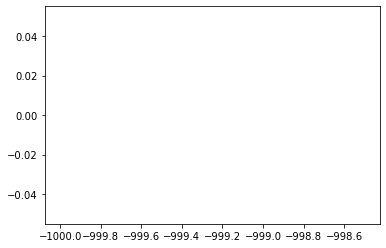

In [36]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-1000,-998.5))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 239050.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

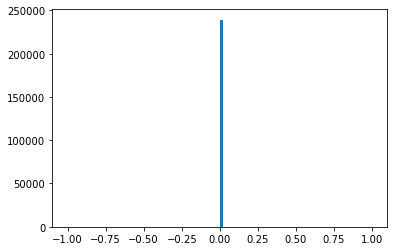

In [37]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-1,1))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 239050.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

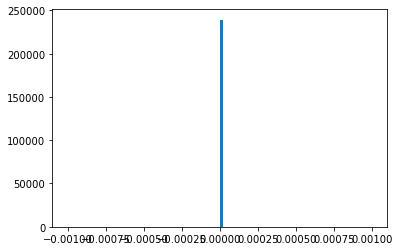

In [38]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-0.001,0.001))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.0001e+01, -9.9010e+00, -9.8010e+00, -9.7010e+00, -9.6010e+00,
        -9.5010e+00, -9.4010e+00, -9.3010e+00, -9.2010e+00, -9.1010e+00,
        -9.0010e+00, -8.9010e+00, -8.8010e+00, -8.7010e+00, -8.6010e+00,
        -8.5010e+00, -8.4010e+00, -8.3010e+00, -8.2010e+00, -8.1010e+00,
        -8.0010e+00, -7.9010e+00, -7.8010e+00, -7.7010e+00, -7.6010e+00,
        -7.5010e+00, -7.4010e+00, -7.3010e+00, -7.2010e+00, -7.1010e+00,
        -7.0010e+00, -6.9010e+00, -6.8010e+00, -6.7010e+00, -6.6010e+00,
        -6.5010e+00, -6.4010e+00, -6.30

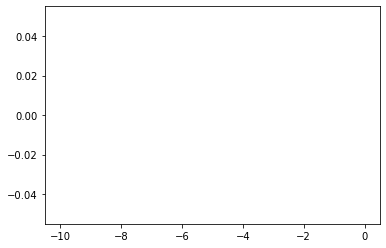

In [39]:
plt.hist(glob_np[interesting_variable], bins=100, range=(-10.001,-0.001))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.001  , 0.00599, 0.01098, 0.01597, 0.02096, 0.02595, 0.03094,
        0.03593, 0.04092, 0.04591, 0.0509 , 0.05589, 0.06088, 0.06587,
        0.07086, 0.07585, 0.08084, 0.08583, 0.09082, 0.09581, 0.1008 ,
        0.10579, 0.11078, 0.11577, 0.12076, 0.12575, 0.13074, 0.13573,
        0.14072, 0.14571, 0.1507 , 0.15569, 0.16068, 0.16567, 0.17066,
        0.17565, 0.18064, 0.18563, 0.19062, 0.19561, 0.2006 , 0.20559,
        0.21058, 0.21557, 0.22056, 0.22555, 0.23054, 0.23553, 0.24052,
        0.24551, 0.2505 , 0.25549, 0.26048, 0.26547, 

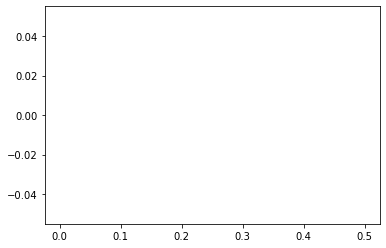

In [40]:
plt.hist(glob_np[interesting_variable], bins=100, range=(0.001,0.5))

(array([2.3905e+05, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        5.6897e+04, 0.0000e+00, 3.4084e+04, 0.0000e+00, 0.0000e+00,
        2.3844e+04, 0.0000e+00, 1.6761e+04, 0.0000e+00, 0.0000e+00,
        1.0569e+04, 0.0000e+00, 6.8460e+03, 0.0000e+00, 0.0000e+00,
        4.4080e+03, 0.0000e+00, 0.0000e+00, 2.7110e+03, 0.0000e+00,
        1.6390e+03, 0.0000e+00, 0.0000e+00, 1.1410e+03, 0.0000e+00,
        7.4400e+02, 0.0000e+00, 0.0000e+00, 4.4400e+02, 0.0000e+00,
        3.0400e+02, 0.0000e+00, 0.0000e+00, 2.0000e+02, 0.0000e+00,
        0.0000e+00, 1.2400e+02, 0.0000e+00, 6.7000e+01, 0.0000e+00,
        0.0000e+00, 5.4000e+01, 0.0000e+00, 4.2000e+01, 0.0000e+00,
        0.0000e+00, 2.7000e+01, 0.0000e+00, 1.8000e+01, 0.0000e+00,
        0.0000e+00, 7.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

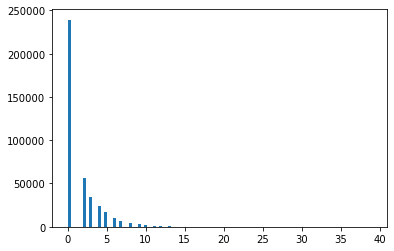

In [41]:
plt.hist(glob_np[interesting_variable], bins=100)

In [42]:
first_cpf_stuff = ak.to_numpy(df_cpf_clip[:,0])

In [43]:
first_cpf_stuff

array([(2.582552 , 0.49685094,  3.394601 , 0.39111567, 0.9894577 , 5.4323955e+00, 37.440704 ,  5.545766  , 35.92345  , -5.9487438e-01, -0.99191874, -0.0857321 , 1., 0.99607843, 0., 5.),
       (3.2344155, 1.2677245 , 16.166862 , 0.17650335, 0.99693966, 1.9267578e-02,  6.4249744,  0.01938684,  6.5175204, -6.8419287e-04, -0.85861206, -0.37429464, 5., 0.99607843, 1., 5.),
       (3.7448602, 0.36129934,  8.187844 , 0.05083602, 0.99902785, 7.7131581e-01, 11.896003 ,  1.9440634 ,  4.773617 , -5.4043323e-01, -0.9541272 , -0.11601138, 1., 1.        , 0., 5.),
       ...,
       (2.0939517, 0.8365904 ,  3.389952 , 0.25886315, 0.9708724 , 1.0162419e+00, 31.516325 ,  1.7154119 , 32.835575 , -3.9626923e-01, -0.8455641 , -0.16507532, 1., 0.8039216 , 1., 5.),
       (1.8156571, 0.60079455,  1.8449464, 0.34012446, 0.95085406, 7.1349998e+00, 67.35532  ,  7.9013305 , 38.974224 , -1.0704285e+00, -0.9239618 ,  0.        , 1., 0.8509804 , 0., 5.),
       (2.489805 , 1.08292   ,  6.5381584, 0.281623  , 0.9

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.  ,  -999.98,  -999.96,  -999.94,  -999.92,  -999.9 ,
         -999.88,  -999.86,  -999.84,  -999.82,  -999.8 ,  -999.78,
         -999.76,  -999.74,  -999.72,  -999.7 ,  -999.68,  -999.66,
         -999.64,  -999.62,  -999.6 ,  -999.58,  -999.56,  -999.54,
         -999.52,  -999.5 ,  -999.48,  -999.46,  -999.44,  -999.42,
         -999.4 ,  -999.38,  -999.36,  -999.34,  -999.32,  -999.3 ,
         -999.28,  -999.26,  -999.24,  -999.22,  -999.2 ,  -999.18,
         -999.16,  -999.14,  -999.12,  -999.1 ,  -999.08,  -999.06,
      

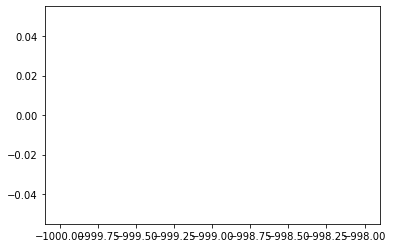

In [44]:
interesting_variable = 'Cpfcan_ptrel'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-1000,-998))

(array([0.0000e+00, 9.9848e+04, 5.3223e+04, 3.7953e+04, 2.9633e+04,
        2.4384e+04, 2.0394e+04, 1.6328e+04, 1.3409e+04, 1.1079e+04,
        9.4580e+03, 7.8270e+03, 6.8470e+03, 5.9520e+03, 5.3260e+03,
        4.5480e+03, 4.0880e+03, 3.5750e+03, 3.1650e+03, 2.9350e+03,
        2.6520e+03, 2.4910e+03, 2.1850e+03, 2.0350e+03, 1.7910e+03,
        1.6650e+03, 1.5040e+03, 1.3490e+03, 1.2670e+03, 1.2280e+03,
        1.0840e+03, 1.0000e+03, 9.1500e+02, 8.4500e+02, 7.9700e+02,
        7.5900e+02, 6.9800e+02, 6.1100e+02, 5.7100e+02, 5.6500e+02,
        5.1300e+02, 4.6600e+02, 4.3900e+02, 4.1700e+02, 4.0100e+02,
        3.5500e+02, 3.5200e+02, 3.1800e+02, 2.8500e+02, 2.5400e+02,
        2.5200e+02, 2.5000e+02, 2.1200e+02, 2.2300e+02, 1.9100e+02,
        1.7800e+02, 1.9700e+02, 1.7800e+02, 1.6800e+02, 1.4100e+02,
        1.5200e+02, 1.4200e+02, 1.4000e+02, 1.1600e+02, 1.2000e+02,
        1.1300e+02, 1.1500e+02, 1.1400e+02, 1.1000e+02, 1.0500e+02,
        9.2000e+01, 9.6000e+01, 8.2000e+01, 9.90

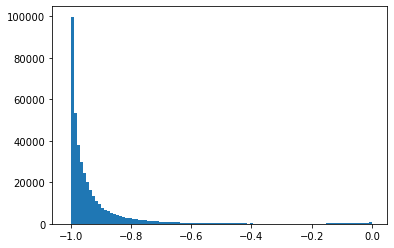

In [45]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([ 62.,  55.,  61.,  57.,  53.,  64.,  40.,  52.,  43.,  47.,  53.,
         44.,  44.,  45.,  50.,  47.,  43.,  39.,  44.,  47.,  49.,  44.,
         41.,  39.,  44.,  32.,  31.,  40.,  43.,  30.,  33.,  28.,  36.,
         41.,  43.,  28.,  39.,  36.,  29.,  42.,  31.,  40.,  34.,  28.,
         40.,  37.,  32.,  44.,  38.,  35.,  32.,  43.,  38.,  40.,  48.,
         42.,  47.,  53.,  51.,  54.,  56.,  48.,  70.,  57.,  64.,  51.,
         67.,  71.,  68.,  69.,  83.,  70.,  86.,  89.,  88.,  88.,  93.,
        119., 102., 133., 127., 138., 136., 161., 133., 160., 177., 170.,
        162., 182., 165., 209., 222., 201., 219., 216., 196., 168., 117.,
        574.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0.312, -0.308,
        -0.304, -0.3  , -0.296, -0.292, -0.288, -0.284, -0.28 , -0.276,
        -0.272, -0.268, -0.264

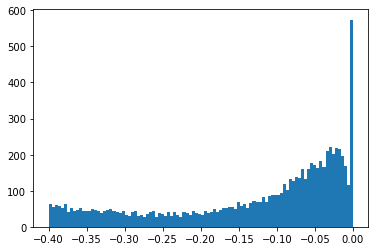

In [46]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,   58.,  445.,
         948., 1818., 2403., 2832., 3185., 3288., 3409., 3283., 3265.,
        3066., 3025., 3028., 2960., 2877., 2692., 2509., 2559., 2552.,
        2341., 2241., 2160., 2121., 2047., 1954., 1959., 1981., 1916.,
        1815., 1814., 1789., 1660., 1745., 1617., 1619., 1625., 1581.,
        1517., 1569., 1482., 1447., 1408., 1349., 1380., 1320., 1427.,
        1361.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062

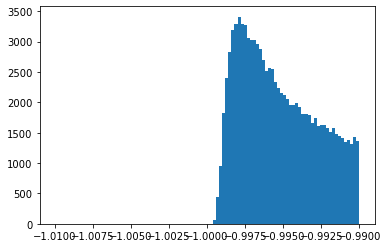

In [47]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([  5.,   4.,   6.,   7.,   4.,   6.,   5.,  12.,  11.,   8.,  11.,
          6.,   4.,   6.,  10.,   6.,   4.,   6.,   4.,   4.,   6.,  11.,
          5.,   4.,   3.,   4.,   2.,   9.,   7.,   5.,   1.,   3.,   6.,
          1.,   3.,   2.,   4.,   2.,   2.,   2.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   4.,  54.,  83., 625.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 , -0.0088,
        -0.0086, -0.0084, -0.0082, -0.008 , -0.0078, -0.0076, -0.0074,
        -0.0072, -0.007 , -0.0068, -0.0066, -0.0064, -0.0062, -0.006 ,
        -0.0058, -0.0056, -0.0054, -0.0052, -0.005 , -0.0048, -0.0046,
        -0.0044, -0.0042, -0.004 ,

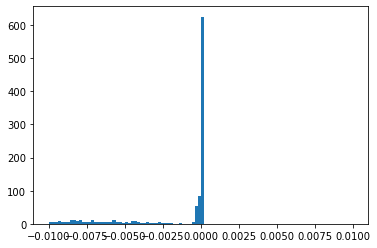

In [48]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([625.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

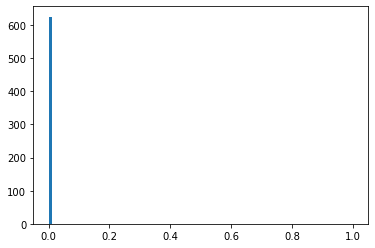

In [49]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(0,1))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        1.004, 1.005, 1.006, 1.007, 1.008, 1.009, 1.01 , 1.011, 1.012,
        1.013, 1.014, 1.015, 1.016, 1.017, 1.018, 1.0

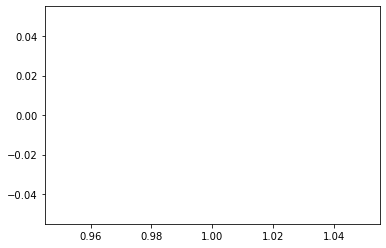

In [50]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([625.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 , 1.55, 1.6 ,
        1.65, 1.7 , 1.75, 1.8 , 1.85, 1.9 , 1.95, 2.  , 2.05, 2.1 , 2.15,
        2.2 , 2.25, 2.

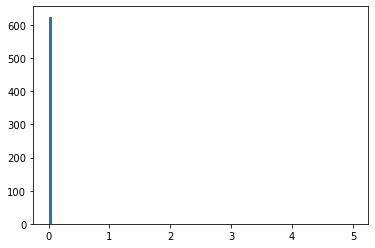

In [51]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100,range=(0,5))

(array([1.01869e+05, 5.20840e+04, 3.74190e+04, 2.92780e+04, 2.41440e+04,
        2.02280e+04, 1.62770e+04, 1.33610e+04, 1.10670e+04, 9.42700e+03,
        7.90200e+03, 6.76700e+03, 5.99500e+03, 5.34200e+03, 4.49500e+03,
        4.17000e+03, 3.57800e+03, 3.18700e+03, 2.94900e+03, 2.67400e+03,
        2.47200e+03, 2.22700e+03, 2.01500e+03, 1.84400e+03, 1.65800e+03,
        1.54100e+03, 1.36800e+03, 1.27400e+03, 1.23700e+03, 1.06800e+03,
        1.04300e+03, 9.17000e+02, 8.45000e+02, 8.01000e+02, 7.84000e+02,
        7.07000e+02, 6.25000e+02, 5.93000e+02, 5.56000e+02, 5.21000e+02,
        4.92000e+02, 4.43000e+02, 3.98000e+02, 4.22000e+02, 3.61000e+02,
        3.42000e+02, 3.28000e+02, 2.99000e+02, 2.80000e+02, 2.55000e+02,
        2.51000e+02, 2.12000e+02, 2.17000e+02, 2.09000e+02, 1.81000e+02,
        1.72000e+02, 1.94000e+02, 1.79000e+02, 1.55000e+02, 1.35000e+02,
        1.40000e+02, 1.47000e+02, 1.24000e+02, 1.20000e+02, 1.15000e+02,
        1.24000e+02, 1.10000e+02, 1.07000e+02, 1.15

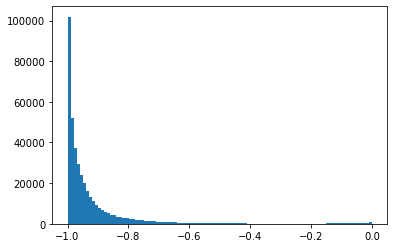

In [52]:
plt.hist(first_cpf_stuff[interesting_variable],bins=100)

In [53]:
first_cpf_pts_stuff = ak.to_numpy(df_cpf_pts_clip[:,0])

In [54]:
first_cpf_pts_stuff

array([(1.2607422, -1.65862   ,  0.85433066,  3.4336052),
       (7.1953125, -1.4524369 , -0.71096057, 16.21709  ),
       (7.0195312,  0.57112336,  0.5904491 ,  8.197    ), ...,
       (3.3867188,  0.2482986 , -0.93137896,  3.4944422),
       (1.7539062,  0.4570452 ,  2.8481286 ,  1.9453145),
       (4.1875   ,  1.0329294 ,  2.059924  ,  6.6287026)],
      dtype=[('Cpfcan_pt', '<f4'), ('Cpfcan_eta', '<f4'), ('Cpfcan_phi', '<f4'), ('Cpfcan_e', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

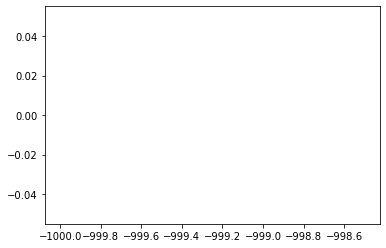

In [55]:
interesting_variable = 'Cpfcan_e'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 68.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.9292, -0.9191, -0.909 , -0.8989, -0.8888, -0.8787,
        -0.8686, -0.8585, -0.8484, -0.8383, -0.8282, -0.8181, -0.808 ,
        -0.7979, -0.7878, -0.7777, -0.7676, -0.7575, -0.7474, -0.7373,
        -0.7272, -0.7171, -0.707 , -0.6969, -0.6868, -0.6767, -0.6666,
        -0.6565, -0.6464, -0.6363, -0.6262, -0.6161, -0.606 , -0.5959,
        

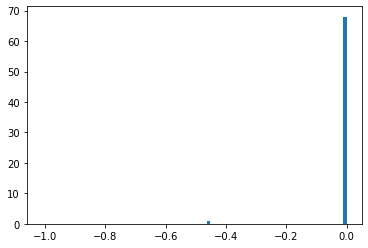

In [56]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., 67.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0.312, -0.308,
        -0.304, -0.3  , -0.296, -0.292, -0.288, -0.284, -0.28 , -0.276,
        -0.272, -0.268, -0.264, -0.26 , -0.256, -0.252, -0.248, -0.244,
        -0.24 , -0.236, -0.232, -0.228, -0.224, -0.22 , -0.216, -0.212,
  

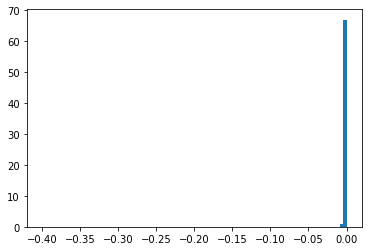

In [57]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

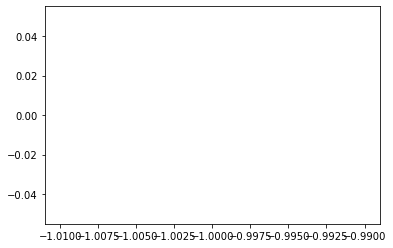

In [58]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   2.,  63., 204.,   1.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([-0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 , -0.0088,
        -0.0086, -0.0084, -0.0082, -0.008 , -0.0078, -0.0076, -0.0074,
        -0.0072, -0.007 , -0.0068, -0.0066, -0.0064, -0.0062, -0.006 ,
        -0.0058, -0.0056, -0.0054, -0.0052, -0.005 , -0.0048, -0.0046,
        -0.0044, -0.0042, -0.004 ,

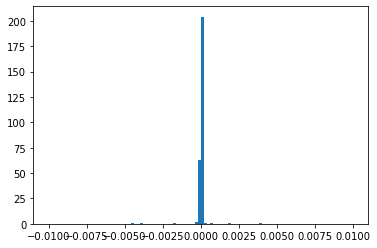

In [59]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([208.,   0.,   0.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  93., 187., 224.,
        308.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

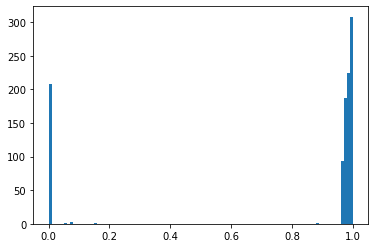

In [60]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(0,1))

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  7.,  3.,
         8.,  9.,  7.,  8., 14., 20., 14., 22., 15., 10., 20., 16., 21.,
        21., 21., 28., 13., 22., 16., 25., 24., 16., 19., 24., 24., 28.,
        26., 38., 34., 37., 33., 32., 26., 30., 26., 23., 29., 31., 29.,
        23., 31., 37., 34., 30., 40., 31., 32., 37., 35., 19., 28., 35.,
        39., 34., 30., 39., 41., 43., 43., 39., 45., 47., 36., 50., 45.,
        32., 35., 36., 42., 37., 38., 34., 46., 44., 40., 43., 46., 47.,
        53., 39., 43., 33., 43., 42., 48., 41., 48.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        

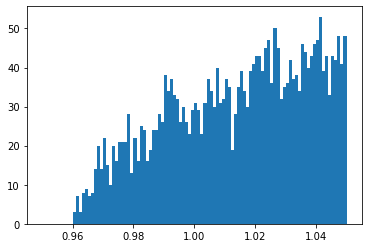

In [61]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([2.080e+02, 3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 8.120e+02, 1.913e+03, 2.477e+03, 2.830e+03, 3.046e+03,
        3.327e+03, 3.537e+03, 3.579e+03, 3.585e+03, 3.655e+03, 3.529e+03,
        3.704e+03, 3.690e+03, 3.605e+03, 3.673e+03, 3.627e+03, 3.624e+03,
        3.566e+03, 3.564e+03, 3.438e+03, 3.523e+03, 3.423e+03, 3.273e+03,
        3.311e+03, 3.226e+03, 3.219e+03, 3.180e+03, 3.175e+03, 2.971e+03,
        3.207e+03, 3.097e+03, 2.968e+03, 3.123e+03, 3.008e+03, 2.982e+03,
        2.917e+03, 2.881e+03, 2.801e+03, 2.761e+03, 2.721e+03, 2.646e+03,
        2.668e+03, 2.704e+03, 2.543e+03, 2.455e+03, 2.517e+03, 2.439e+03,
        2.386e+03, 2.439e+03, 2.353e+03, 2.355e+03, 2.163e+03, 2.231e+03,
        2.212e+03, 2.215e+03, 2.114e+03, 2.127e+03, 2.022e+03, 1.951e+03,
        1.966e+03, 2.077e+03, 1.963e+0

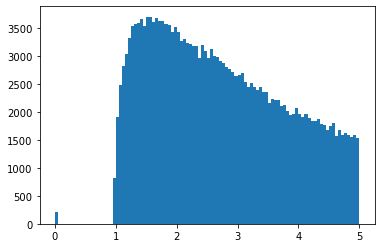

In [62]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(0,5))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 6.800e+01, 2.110e+02, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.135e+03, 6.943e+03,
        8.276e+03, 8.675e+03, 8.730e+03, 8.799e+03, 8.655e+03, 8.506e+03,
        8.323e+03, 7.954e+03, 7.653e+03, 7.433e+03, 7.468e+03, 7.306e+03,
        7.104e+03, 6.779e+03, 6.455e+03, 6.412e+03, 5.979e+03, 5.812e+03,
        5.726e+03, 5.324e+03, 5.308e+0

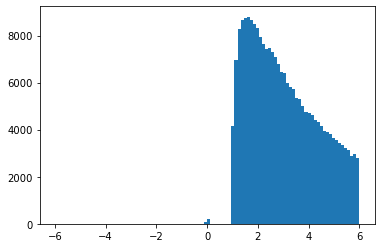

In [63]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100,range=(-6,6))

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 3.99991e+05,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

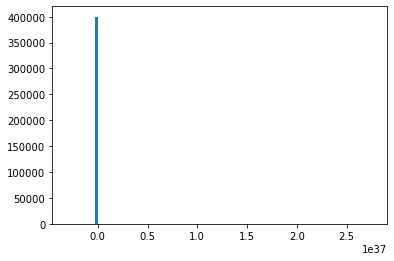

In [64]:
plt.hist(first_cpf_pts_stuff[interesting_variable],bins=100)

In [65]:
first_npf_pts_stuff = ak.to_numpy(df_npf_pts_clip[:,0])

In [66]:
first_npf_pts_stuff

array([(31.640625 , -1.5941648 ,  1.1947634 , 81.11538  ),
       ( 1.2197266, -1.4610431 , -0.6644654 ,  2.770272 ),
       ( 1.8769531,  0.38947722,  0.24786434,  2.0211217), ...,
       ( 2.484375 ,  0.407239  , -0.9756118 ,  2.6932468),
       ( 2.6933594,  0.37739187, -3.1229434 ,  2.8874469),
       (12.8984375,  1.2510147 ,  2.3031962 , 24.378696 )],
      dtype=[('Npfcan_pt', '<f4'), ('Npfcan_eta', '<f4'), ('Npfcan_phi', '<f4'), ('Npfcan_e', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

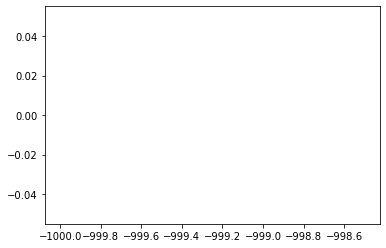

In [67]:
interesting_variable = 'Npfcan_e'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([15., 22., 26., 15., 22., 18., 23., 19., 24., 23., 25., 18., 20.,
        22., 24., 25., 22., 23., 18., 21., 20., 15., 22., 12., 17., 24.,
        24., 18., 32., 19., 20., 26., 28., 22., 18., 19., 19., 15., 27.,
        16., 24., 23., 16., 22., 19., 32., 23., 19., 23., 29., 26., 26.,
        26., 23., 26., 23., 27., 19., 24., 25., 25., 19., 23., 17., 19.,
        24., 25., 23., 26., 20., 20., 20., 31., 22., 25., 35., 23., 20.,
        20., 19., 22., 20., 25., 23., 28., 21., 20., 20., 17., 24., 16.,
        15., 24., 21., 16., 20., 20., 20., 16., 23.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.9292, -0.9191, -0.909 , -0.8989, -0.8888, -0.8787,
        -0.8686, -0.8585, -0.8484, -0.8383, -0.8282, -0.8181, -0.808 ,
        -0.7979, -0.7878, -0.7777, -0.7676, -0.7575, -0.7474, -0.7373,
        -0.7272, -0.7171, -0.707 , -0.6969, -0.6868, -0.6767, -0.6666,
        -0.6565, -0.6464, -0.6363, -0.6262, -0.6161, -0.606 , -0.5959,
        

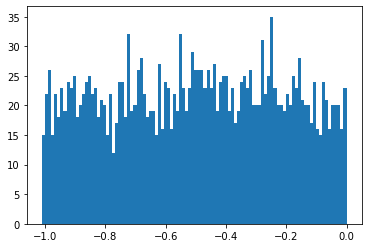

In [68]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-1.01,0))

In [140]:
first_npf_pts_stuff

array([(31.640625 , -1.5941648 ,  1.1947634 , 81.11538  ),
       ( 1.2197266, -1.4610431 , -0.6644654 ,  2.770272 ),
       ( 1.8769531,  0.38947722,  0.24786434,  2.0211217), ...,
       ( 2.484375 ,  0.407239  , -0.9756118 ,  2.6932468),
       ( 2.6933594,  0.37739187, -3.1229434 ,  2.8874469),
       (12.8984375,  1.2510147 ,  2.3031962 , 24.378696 )],
      dtype=[('Npfcan_pt', '<f4'), ('Npfcan_eta', '<f4'), ('Npfcan_phi', '<f4'), ('Npfcan_e', '<f4')])

(array([16.,  7.,  7., 11.,  9.,  7., 10.,  4.,  9., 11.,  6.,  8.,  8.,
        10.,  8.,  9., 13.,  8., 10., 11.,  8., 10.,  8.,  7., 12.,  6.,
         8.,  9.,  7.,  9., 12., 12., 10., 10.,  8.,  6., 12., 19., 12.,
         9., 11., 10.,  5.,  9., 10.,  7.,  7.,  7.,  8.,  6., 10.,  9.,
         8.,  8., 10., 10.,  8.,  7., 11., 11., 12.,  9.,  9., 11.,  5.,
         8.,  8.,  9.,  8., 12.,  5.,  3., 11.,  7.,  9.,  8.,  4.,  7.,
         8.,  4., 11., 10., 10.,  7.,  6.,  7.,  6., 11.,  7.,  7.,  7.,
         8., 10.,  9.,  4.,  5.,  7.,  7., 14.,  6.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0.312, -0.308,
        -0.304, -0.3  , -0.296, -0.292, -0.288, -0.284, -0.28 , -0.276,
        -0.272, -0.268, -0.264, -0.26 , -0.256, -0.252, -0.248, -0.244,
        -0.24 , -0.236, -0.232, -0.228, -0.224, -0.22 , -0.216, -0.212,
  

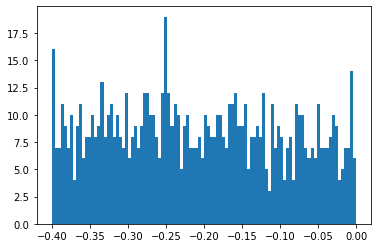

In [69]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 2., 0., 0., 1., 0., 1., 1.,
        2., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 2.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

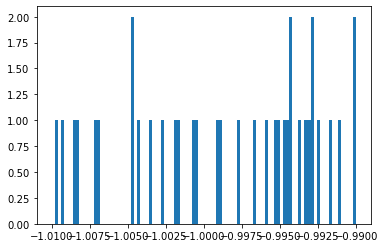

In [70]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 2., 1., 0., 0.,
        0., 0., 0., 0., 2., 2., 1., 0., 2., 1., 1., 1., 0., 0., 0., 1., 2.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 2., 1., 0., 2., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.]),
 array([-0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 , -0.0088,
        -0.0086, -0.0084, -0.0082, -0.008 , -0.0078, -0.0076, -0.0074,
        -0.0072, -0.007 , -0.0068, -0.0066, -0.0064, -0.0062, -0.006 ,
        -0.0058, -0.0056, -0.0054, -0.0052, -0.005 , -0.0048, -0.0046,
        -0.0044, -0.0042, -0.004 , -0.0038, -0.0036, -0.0034, -0.0032,
        -0.003 , -0.0028, -0.0026, -0.0024, -0.0022, -0.002 , -0.0018,
        -0.0016, -0.0014, -0.0012, -0.001 , -0.0008, -0.0006, -0.0004,
        -0.0002,  0.    ,  0.0002,  0.0004,  0.0006, 

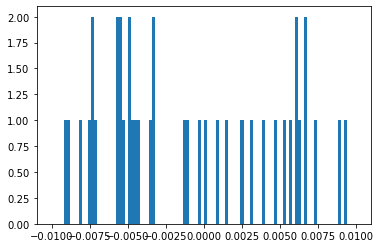

In [71]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([ 17.,  18.,  28.,  20.,  12.,  21.,  27.,  17.,  24.,  42.,  24.,
         19.,  25.,  15.,  25.,  18.,  13.,  14.,  29.,  21.,  15.,  30.,
         26.,  18.,  20.,  38.,  18.,  17.,  24.,  22.,  22.,  21.,  24.,
         21.,  22.,  25.,  28.,  28.,  28.,  20.,  25.,  14.,  11.,  23.,
         19.,  18.,  20.,  22.,  23.,  16.,  19.,  28.,  16.,  13.,  21.,
         17.,  26.,  17.,  21.,  20.,  20.,  19.,  26.,  21.,  16.,  21.,
         20.,  20.,  21.,  23.,  19.,  19.,  14.,  24.,  21.,  29.,  24.,
         22.,   8.,  15.,  24.,  18.,  25.,  27.,  18.,  19.,  28.,  20.,
         22.,  21.,  26.,  20.,  19.,  22.,  18.,  67.,  90., 115., 137.,
        160.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

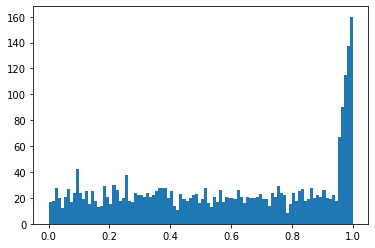

In [72]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(0,1))

(array([ 0.,  7.,  4.,  7.,  9.,  9.,  7.,  7., 10.,  7.,  7., 10., 10.,
        10.,  5.,  8.,  5., 13., 12., 10., 12.,  6., 10., 17., 11.,  9.,
         9., 18., 13., 10., 13., 16., 14., 11., 16., 17., 11., 14., 10.,
        15., 13., 12., 21., 13., 11., 17., 23., 10., 13., 27., 14., 21.,
        20., 13., 16., 12., 16., 13., 10., 12., 15., 20., 13., 15., 17.,
        18., 22., 17., 22., 14., 14., 15., 15., 17., 18., 25., 14., 16.,
        21., 10., 16., 21., 18., 10., 18., 11., 27., 21., 19., 16., 14.,
        24., 17., 25., 20., 28., 12., 16., 14., 18.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        

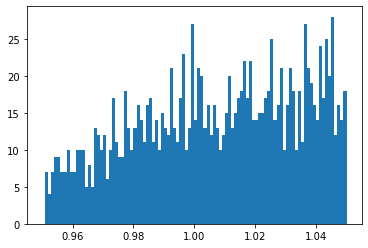

In [73]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([  95.,  131.,  108.,   95.,  109.,  119.,  110.,  129.,   92.,
          99.,   97.,  101.,  102.,  105.,   97.,   98.,  112.,  110.,
         105.,  569.,  850., 1041., 1188., 1339., 1335., 1373., 1507.,
        1471., 1469., 1478., 1536., 1599., 1558., 1524., 1612., 1527.,
        1527., 1561., 1531., 1537., 1451., 1524., 1430., 1492., 1507.,
        1390., 1467., 1381., 1404., 1507., 1474., 1448., 1324., 1502.,
        1429., 1451., 1401., 1362., 1431., 1353., 1485., 1291., 1470.,
        1289., 1290., 1321., 1205., 1191., 1202., 1191., 1191., 1151.,
        1149., 1194., 1186., 1054., 1027., 1182., 1094., 1138., 1034.,
        1087., 1109., 1062., 1074.,  988., 1037., 1083.,  997.,  945.,
        1106.,  980.,  990.,  932.,  968., 1007.,  944.,  997.,  943.,
        1011.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45

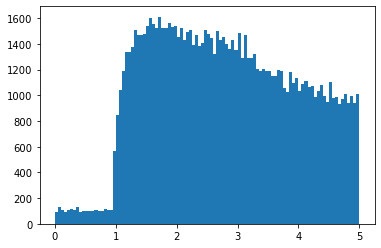

In [74]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(0,5))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,   43.,  264.,  253.,  249.,
         225.,  277.,  264.,  262.,  263.,  291.,  272.,  278.,  273.,
         264.,  297.,  248.,  299.,  262.,  234.,  260.,  239.,  256.,
         280.,  273.,  285.,  263.,  225.,  269.,  249.,  274.,  256.,
         237.,  245.,  251.,  300., 1948., 2972., 3301., 3583., 3588.,
        3736., 3781., 3673., 3644., 3529., 3542., 3410., 3477., 3385.,
        3530., 3347., 3347., 3388., 3195., 2999., 2862., 2833., 2805.,
        2613., 2703., 2599., 2596., 2483., 2519., 2424., 2328., 2353.,
        2305., 2253., 2132., 2056., 2161., 2154., 1987., 2054., 2074.,
        1902.]),
 array([-6.  , -5.88, -5.76, -5.64, -5.52, -5.4 , -5.28, -5.16, -5.04,
        -4.92, -4.8 , -4.68, -4.56, -4.44, -4.32, -4.2 , -4.08, -3.96,
        -3.84, -3.72, -3.6 , -3.48, -3.36, -3.24, -3.12, -3.

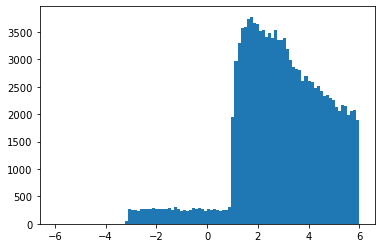

In [75]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100,range=(-6,6))

(array([2.65693e+05, 3.61850e+04, 1.85300e+04, 1.27380e+04, 9.58500e+03,
        7.81300e+03, 6.49000e+03, 5.57300e+03, 4.86300e+03, 4.06000e+03,
        3.57300e+03, 3.06000e+03, 2.69200e+03, 2.37700e+03, 2.01200e+03,
        1.73100e+03, 1.50400e+03, 1.32600e+03, 1.18800e+03, 9.93000e+02,
        9.71000e+02, 8.46000e+02, 7.14000e+02, 6.14000e+02, 4.79000e+02,
        5.06000e+02, 4.08000e+02, 3.79000e+02, 3.34000e+02, 2.81000e+02,
        2.63000e+02, 2.17000e+02, 2.15000e+02, 2.05000e+02, 1.64000e+02,
        1.44000e+02, 1.08000e+02, 1.19000e+02, 1.12000e+02, 1.05000e+02,
        9.20000e+01, 7.60000e+01, 6.80000e+01, 6.30000e+01, 6.20000e+01,
        5.20000e+01, 4.60000e+01, 4.20000e+01, 2.40000e+01, 3.20000e+01,
        2.50000e+01, 2.60000e+01, 2.00000e+01, 2.30000e+01, 1.90000e+01,
        1.80000e+01, 1.50000e+01, 1.30000e+01, 2.30000e+01, 7.00000e+00,
        8.00000e+00, 9.00000e+00, 5.00000e+00, 9.00000e+00, 1.00000e+00,
        6.00000e+00, 6.00000e+00, 3.00000e+00, 3.00

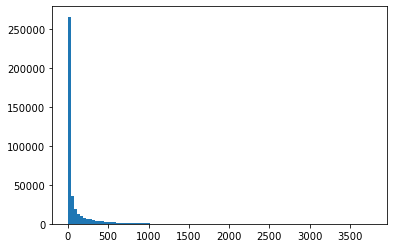

In [76]:
plt.hist(first_npf_pts_stuff[interesting_variable],bins=100)

In [77]:
first_vtx_pts_stuff = ak.to_numpy(df_vtx_pts_clip[:,0])

In [78]:
first_vtx_pts_stuff

array([(40.92438  , -1.6263797 ,  1.1669405 , 108.09734  ),
       (17.476078 , -1.44862   , -0.68554014,  39.263157 ),
       ( 4.3416257,  0.7246975 ,  0.35156727,   5.606667 ), ...,
       (13.906122 ,  0.48273987, -0.94644225,  15.680996 ),
       ( 6.1343594,  0.17103565, -3.0363085 ,   6.2517395),
       (24.378696 , 24.378696  ,  1.2510147 ,   2.3031962)],
      dtype=[('sv_pt', '<f4'), ('sv_eta', '<f4'), ('sv_phi', '<f4'), ('sv_e', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

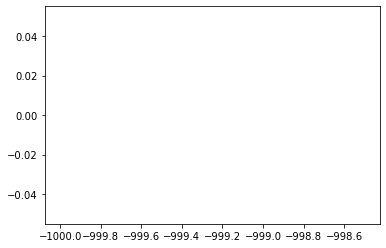

In [79]:
interesting_variable = 'sv_e'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([343., 293., 320., 286., 306., 336., 295., 312., 254., 323., 254.,
        287., 293., 284., 279., 296., 336., 378., 301., 322., 282., 294.,
        313., 310., 334., 348., 340., 282., 323., 292., 324., 327., 286.,
        333., 340., 376., 316., 295., 306., 311., 313., 292., 272., 355.,
        272., 296., 268., 295., 257., 302., 297., 318., 375., 305., 326.,
        296., 264., 289., 294., 309., 298., 333., 338., 322., 277., 291.,
        271., 275., 315., 365., 299., 335., 291., 306., 332., 327., 303.,
        285., 347., 288., 303., 319., 303., 283., 336., 353., 296., 373.,
        294., 303., 337., 303., 279., 335., 315., 372., 274., 307., 296.,
        260.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.9292, -0.9191, -0.909 , -0.8989, -0.8888, -0.8787,
        -0.8686, -0.8585, -0.8484, -0.8383, -0.8282, -0.8181, -0.808 ,
        -0.7979, -0.7878, -0.7777, -0.7676, -0.7575, -0.7474, -0.7373,
        -0.7272, -0.7171, -0.707 ,

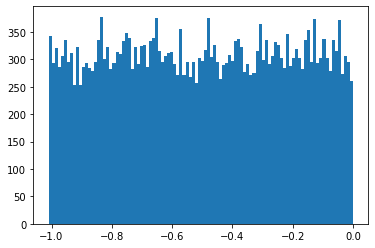

In [80]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([105., 165., 129., 102., 130., 148., 146., 117., 114., 107., 103.,
        113., 120., 119.,  93., 128., 104.,  94., 127., 125., 113., 122.,
        131., 168., 126., 118., 135., 113., 142., 119., 107., 122., 127.,
        113., 126., 145., 129., 151., 101., 125., 112., 127.,  89., 124.,
        124., 182., 109.,  95., 133., 116., 140., 100., 135., 106., 132.,
        119., 124.,  87., 134., 119., 138., 146., 124., 159., 117., 108.,
        127., 179., 118., 130., 119., 116., 128., 113., 114., 148., 128.,
        117., 127., 120.,  95., 125., 120., 134., 121., 133., 129., 133.,
        125., 164., 107., 124., 124.,  88., 135., 109., 113., 132., 107.,
         93.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364, -0.36 , -0.356, -0.352, -0.348, -0.344, -0.34 ,
        -0.336, -0.332, -0.328, -0.324, -0.32 , -0.316, -0.312, -0.308,
        -0.304, -0.3  , -0.296, -0.292, -0.288, -0.284, -0.28 , -0.276,
        -0.272, -0.268, -0.264

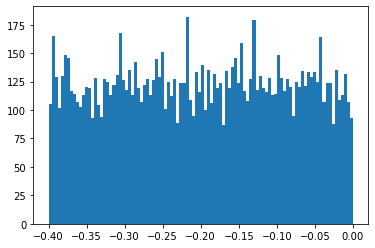

In [81]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([ 7.,  8.,  5.,  4.,  3.,  7.,  4.,  1.,  1.,  8.,  4.,  3.,  1.,
        13., 10., 10.,  5.,  9.,  3.,  6.,  3.,  4.,  9.,  6.,  3.,  5.,
         9.,  5.,  2.,  6.,  3., 70.,  6.,  3.,  6.,  8.,  2.,  6.,  2.,
         5.,  9.,  7., 11.,  9., 13.,  2.,  5.,  3.,  4.,  5.,  4.,  7.,
         5.,  5.,  6.,  2.,  8.,  6.,  4.,  8.,  4.,  8.,  6.,  4.,  6.,
         8.,  4.,  4.,  4.,  7.,  3.,  6.,  8.,  7.,  5.,  6.,  5., 10.,
         8.,  6.,  3.,  5.,  3.,  3.,  9.,  4.,  9.,  4.,  2.,  4.,  5.,
         3.,  1.,  3.,  5.,  7.,  2.,  9., 12., 17.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        

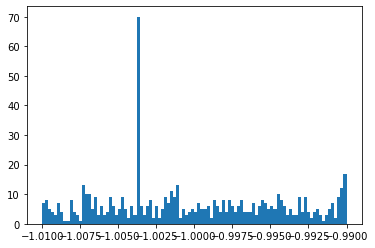

In [82]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([ 6.,  9.,  5.,  3.,  3.,  7.,  4.,  6., 12.,  2.,  1.,  4.,  5.,
         1.,  6.,  6.,  7., 12.,  9.,  6.,  9.,  5.,  5.,  4.,  3.,  4.,
         3.,  4.,  5.,  8.,  3.,  4.,  4.,  4.,  2.,  2.,  4.,  1.,  6.,
         3.,  6.,  6.,  2.,  2., 10.,  6.,  8.,  4.,  9.,  5.,  8.,  5.,
         7.,  2.,  4.,  4.,  6.,  5.,  4.,  4.,  5.,  6.,  9.,  5., 10.,
         6.,  5.,  3.,  4., 12.,  8.,  4.,  7.,  2.,  2.,  7.,  5.,  6.,
         9.,  1.,  3.,  7.,  8.,  2.,  2.,  5.,  2.,  3.,  5.,  7.,  6.,
         8.,  6.,  5.,  2.,  4.,  4.,  3.,  1.,  2.]),
 array([-0.01  , -0.0098, -0.0096, -0.0094, -0.0092, -0.009 , -0.0088,
        -0.0086, -0.0084, -0.0082, -0.008 , -0.0078, -0.0076, -0.0074,
        -0.0072, -0.007 , -0.0068, -0.0066, -0.0064, -0.0062, -0.006 ,
        -0.0058, -0.0056, -0.0054, -0.0052, -0.005 , -0.0048, -0.0046,
        -0.0044, -0.0042, -0.004 , -0.0038, -0.0036, -0.0034, -0.0032,
        -0.003 , -0.0028, -0.0026, -0.0024, -0.0022, -0.002 , -0.0018,
        

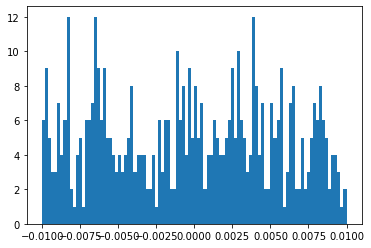

In [83]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([250., 272., 295., 263., 390., 311., 320., 272., 306., 279., 285.,
        270., 286., 369., 325., 314., 306., 249., 321., 279., 270., 348.,
        309., 313., 277., 348., 303., 311., 305., 336., 344., 302., 293.,
        343., 271., 311., 291., 322., 324., 342., 325., 309., 315., 263.,
        312., 300., 272., 339., 312., 327., 315., 310., 256., 295., 276.,
        307., 369., 305., 301., 302., 320., 285., 289., 324., 297., 350.,
        316., 266., 308., 289., 293., 301., 312., 282., 328., 292., 315.,
        296., 260., 305., 277., 298., 332., 296., 309., 303., 280., 274.,
        279., 291., 251., 336., 294., 310., 304., 289., 269., 308., 321.,
        272.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

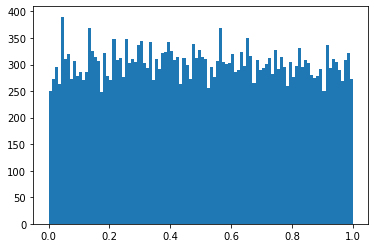

In [84]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(0,1))

(array([27., 34., 20., 22., 35., 28., 29., 33., 19., 42., 28., 19., 18.,
        24., 31., 28., 45., 36., 19., 21., 22., 45., 28., 27., 34., 28.,
        27., 37., 32., 28., 29., 26., 29., 31., 41., 28., 38., 22., 44.,
        33., 25., 28., 30., 23., 26., 36., 30., 24., 26., 24., 25., 37.,
        17., 87., 20., 31., 42., 18., 33., 27., 27., 26., 25., 26., 19.,
        26., 24., 32., 49., 18., 23., 28., 17., 44., 27., 26., 28., 27.,
        29., 28., 27., 28., 27., 26., 32., 53., 28., 21., 25., 19., 29.,
        26., 17., 35., 29., 22., 16., 25., 29., 26.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        

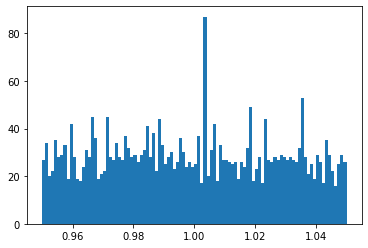

In [85]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([1470., 1488., 1535., 1469., 1517., 1603., 1553., 1590., 1524.,
        1550., 1452., 1584., 1515., 1529., 1516., 1468., 1512., 1427.,
        1495., 1459., 1426., 1439., 1405., 1459., 1429., 1555., 1470.,
        1492., 1490., 1496., 1515., 1345., 1533., 1456., 1530., 1520.,
        1460., 1554., 1445., 1699., 1541., 1547., 1564., 1497., 1620.,
        1609., 1698., 1673., 1637., 1607., 1631., 1555., 1565., 1542.,
        1518., 1538., 1623., 1601., 1576., 1489., 1590., 1629., 1310.,
         195.,  183.,  174.,  206.,  214.,  193.,  210.,  205.,  199.,
         193.,  228.,  214.,  235.,  216.,  218.,  227.,  229.,  197.,
         223.,  221.,  222.,  242.,  189.,  243.,  231.,  227.,  215.,
         283.,  258.,  228.,  257.,  218.,  240.,  243.,  240.,  253.,
         247.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  , 1.05,
        1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45

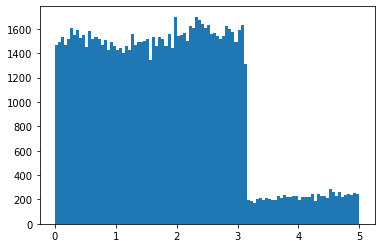

In [86]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(0,5))

(array([14366., 14696., 15670., 15445.,  6866.,  2092.,  2183.,  2382.,
         2406.,  2366.,  2435.,  2491.,  2436.,  2351.,  2356.,  2261.,
         2282.,  2369.,  2321.,  2163.,  2184.,  2083.,  2048.,  2075.,
         1962.,  1939.,  1908.,  1868.,  1863.,  1821.,  1855.,  1815.,
         1763.,  1680.,  1661.,  1610.,  1535.,  1580.,  1527.,  1537.,
         1518.,  1456.,  1441.,  1416.,  1353.,  1399.,  1376.,  1258.,
         1293.,  1307.,  1258.,  1183.,  1188.,  1241.,  1129.,  1154.,
         1062.,  1113.,  1061.,  1042.,  1103.,  1070.,  1001.,   977.,
          979.,   968.,   968.,   945.,   935.,   905.,   885.,   917.,
          925.,   845.,   833.,   837.,   797.,   815.,   779.,   771.,
          780.,   766.,   783.,   730.,   733.,   750.,   670.,   689.,
          701.,   684.,   678.,   669.,   663.,   642.,   676.,   639.,
          650.,   636.,   617.,   587.]),
 array([ 1.  ,  1.49,  1.98,  2.47,  2.96,  3.45,  3.94,  4.43,  4.92,
         5.41,  5.9 ,  

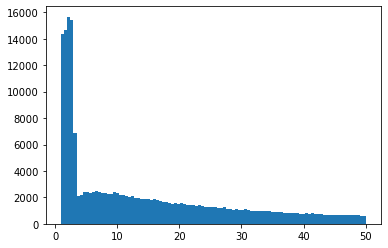

In [87]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(1,50))

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,  493., 3398., 3391., 3489.,
        3582., 3416., 3543., 3664., 3550., 3573., 3589., 3682., 3538.,
        3519., 3597., 3404., 3510., 3605., 3532., 3510., 3813., 3760.,
        3592., 3607., 3659., 3753., 3639., 3513., 3689., 3744., 3714.,
        3675., 3638., 3593., 3520., 3467., 3432., 3550., 3584., 3609.,
        3458., 3630., 3596., 3819., 3694., 3766., 4032., 3908., 3762.,
        3707., 3788., 3717., 3854., 1022.,  457.,  486.,  489.,  497.,
         553.,  525.,  526.,  522.,  529.,  548.,  617.,  573.,  564.,
         589.,  587.,  584.,  601.,  585.,  574.,  600.,  596.,  560.,
         587.]),
 array([-6.  , -5.88, -5.76, -5.64, -5.52, -5.4 , -5.28, -5.16, -5.04,
        -4.92, -4.8 , -4.68, -4.56, -4.44, -4.32, -4.2 , -4.08, -3.96,
        -3.84, -3.72, -3.6 , -3.48, -3.36, -3.24, -3.12, -3.

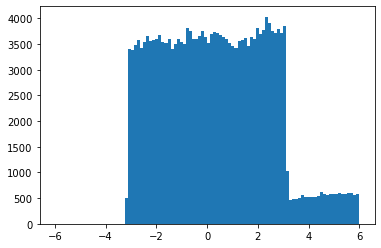

In [88]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100,range=(-6,6))

(array([2.8035e+05, 4.7399e+04, 2.2728e+04, 1.3140e+04, 8.3750e+03,
        6.0130e+03, 4.1430e+03, 3.2110e+03, 2.4690e+03, 2.0630e+03,
        1.5870e+03, 1.3280e+03, 1.0230e+03, 8.2500e+02, 7.1000e+02,
        6.2000e+02, 4.8300e+02, 4.4600e+02, 3.6900e+02, 2.8500e+02,
        2.7400e+02, 2.4600e+02, 2.1100e+02, 1.8400e+02, 1.7300e+02,
        1.2800e+02, 1.1800e+02, 1.0300e+02, 8.7000e+01, 9.9000e+01,
        9.3000e+01, 7.3000e+01, 5.1000e+01, 4.5000e+01, 5.1000e+01,
        4.5000e+01, 2.1000e+01, 3.5000e+01, 3.0000e+01, 2.4000e+01,
        3.1000e+01, 1.8000e+01, 2.4000e+01, 1.8000e+01, 1.8000e+01,
        1.8000e+01, 1.2000e+01, 1.8000e+01, 1.5000e+01, 1.1000e+01,
        1.3000e+01, 1.5000e+01, 1.2000e+01, 8.0000e+00, 5.0000e+00,
        7.0000e+00, 5.0000e+00, 6.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 3.0000e+00, 3.0000e+00, 4.0000e+00, 5.0000e+00,
        4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 8.0000e+00,
        2.0000e+00, 3.0000e+00, 3.0000e+00, 2.00

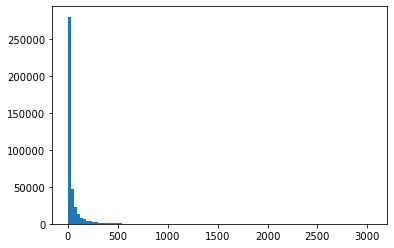

In [89]:
plt.hist(first_vtx_pts_stuff[interesting_variable],bins=100)

In [90]:
first_npf_stuff = ak.to_numpy(df_npf_clip[:,0])

In [91]:
df_npf_clip[1,:5]

<Record ... 0.996, 0.992, 0.992, 0.988]} type='{"Npfcan_ptrel": 5 * ?float32, "N...'>

In [92]:
first_npf_stuff

array([(-0.7971864, -0.47113132, -0.45093936, -0.543076  , 1., 0., -0.35743344, 0.99607843),
       (-0.9760324, -0.4907838 , -0.36999285, -0.46966666, 1., 0., -0.37553617, 0.99607843),
       (-0.9877341, -0.36879542, -0.16373584, -0.23904541, 1., 0., -0.17687078, 0.99607843),
       ...,
       (-0.8867114, -0.4222955 , -0.43930745, -0.501402  , 1., 0., -0.31906024, 0.94509804),
       (-0.8832332, -0.45671543, -0.4949842 , -0.5564258 , 1., 0., -0.17619544, 0.99607843),
       (-0.8358164, -0.48399115, -0.45288226, -0.55023694, 1., 0.,  0.        , 0.99607843)],
      dtype=[('Npfcan_ptrel', '<f4'), ('Npfcan_etarel', '<f4'), ('Npfcan_phirel', '<f4'), ('Npfcan_deltaR', '<f4'), ('Npfcan_isGamma', '<f4'), ('Npfcan_HadFrac', '<f4'), ('Npfcan_drminsv', '<f4'), ('Npfcan_puppiw', '<f4')])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.  ,  -999.98,  -999.96,  -999.94,  -999.92,  -999.9 ,
         -999.88,  -999.86,  -999.84,  -999.82,  -999.8 ,  -999.78,
         -999.76,  -999.74,  -999.72,  -999.7 ,  -999.68,  -999.66,
         -999.64,  -999.62,  -999.6 ,  -999.58,  -999.56,  -999.54,
         -999.52,  -999.5 ,  -999.48,  -999.46,  -999.44,  -999.42,
         -999.4 ,  -999.38,  -999.36,  -999.34,  -999.32,  -999.3 ,
         -999.28,  -999.26,  -999.24,  -999.22,  -999.2 ,  -999.18,
         -999.16,  -999.14,  -999.12,  -999.1 ,  -999.08,  -999.06,
      

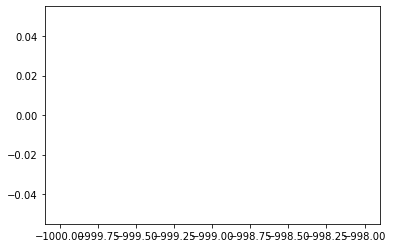

In [93]:
interesting_variable = 'Npfcan_drminsv'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-1000,-998))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,  20317.,  38199.,  26704.,
         19997.,  15444.,  12297.,  10032.,   8307.,   6895.,   5929.,
          5021.,   4402.,   3755.,   3349.,   2932.,   2571.,   2308.,
          2112.,   1943.,   1766.,   1644.,   1501.,   1396.,   1263.,
          1255.,   1188.,   1144.,   1054.,   1079.,   1059.,    970.,
           982.,   1022.,    957.,    956.,   1039.,   1013.,   1019.,
      

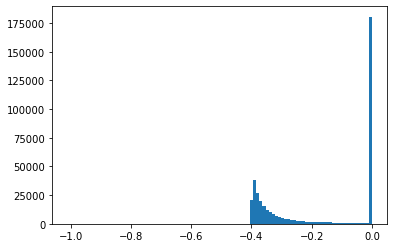

In [94]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([ 11088.,  17750.,  15753.,  13282.,  11523.,  10369.,   9185.,
          8236.,   7297.,   6684.,   5980.,   5442.,   5041.,   4623.,
          4243.,   3999.,   3617.,   3484.,   3115.,   2891.,   2775.,
          2511.,   2370.,   2361.,   2126.,   2006.,   1798.,   1907.,
          1594.,   1576.,   1467.,   1448.,   1357.,   1346.,   1208.,
          1109.,   1133.,   1047.,   1027.,    985.,    913.,    861.,
           839.,    860.,    783.,    794.,    728.,    705.,    733.,
           654.,    692.,    593.,    626.,    556.,    588.,    542.,
           551.,    523.,    492.,    496.,    468.,    526.,    502.,
           445.,    464.,    449.,    451.,    395.,    442.,    446.,
           410.,    420.,    421.,    456.,    382.,    423.,    360.,
           370.,    379.,    395.,    410.,    414.,    362.,    379.,
           392.,    365.,    393.,    416.,    411.,    393.,    427.,
           383.,    412.,    395.,    403.,    397.,    379.,    447.,
      

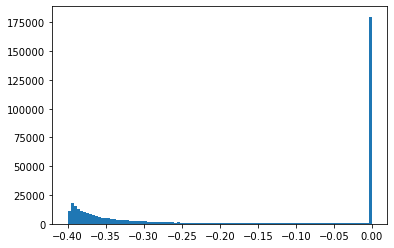

In [95]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,  11088.,  25946.,
         20839.,  16866.,  14211.,  11968.,  10249.,   8838.,   7625.,
          6817.,   6048.,   5376.,   4840.,   4269.,   3908.,   3578.,
          3279.,   2875.,   2836.,   2417.,   2220.,   2153.,   1998.,
          1781.,   1669.,   1567.,   1492.,   1329.,   1284.,   1239.,
          1198.,   1086.,   1080.,    990.,    949.,    902.,    868.,
           819.,    797.,    740.,    716.,    781.,    692.,    699.,
           665.,    618.,    665.,    614.,    637.,    644.,    617.,
           521.,    588.,    597.,    622.,    561.,    572.,    582.,
           592.,    605.,    626.,    581.,    609.,    602.,    577.,
      

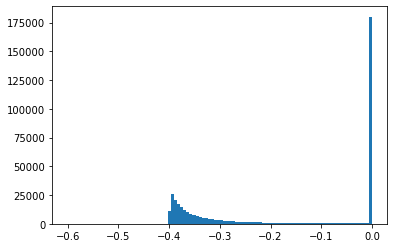

In [96]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-0.60,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

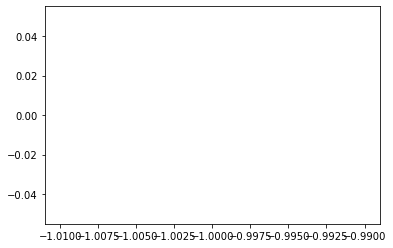

In [97]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([2.00000e+01, 1.80000e+01, 2.60000e+01, 2.00000e+01, 1.60000e+01,
        1.90000e+01, 2.50000e+01, 2.30000e+01, 1.80000e+01, 2.80000e+01,
        1.90000e+01, 3.20000e+01, 1.70000e+01, 1.70000e+01, 1.80000e+01,
        2.60000e+01, 2.40000e+01, 2.80000e+01, 2.10000e+01, 2.10000e+01,
        2.90000e+01, 1.70000e+01, 2.30000e+01, 2.40000e+01, 2.60000e+01,
        2.50000e+01, 2.40000e+01, 2.10000e+01, 2.40000e+01, 2.00000e+01,
        2.60000e+01, 1.50000e+01, 2.70000e+01, 2.20000e+01, 2.20000e+01,
        2.40000e+01, 3.40000e+01, 2.30000e+01, 2.90000e+01, 2.40000e+01,
        1.70000e+01, 2.20000e+01, 2.20000e+01, 2.40000e+01, 2.00000e+01,
        2.40000e+01, 2.40000e+01, 1.70000e+01, 2.50000e+01, 2.80000e+01,
        1.79389e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

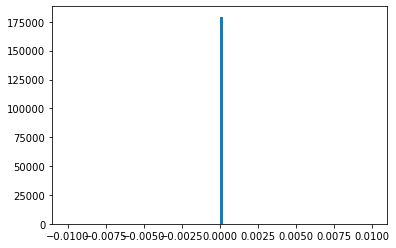

In [98]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([1.79398e+05, 3.00000e+00, 4.00000e+00, 3.00000e+00, 7.00000e+00,
        3.00000e+00, 5.00000e+00, 8.00000e+00, 5.00000e+00, 5.00000e+00,
        5.00000e+00, 7.00000e+00, 4.00000e+00, 8.00000e+00, 4.00000e+00,
        6.00000e+00, 9.00000e+00, 8.00000e+00, 6.00000e+00, 5.00000e+00,
        7.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        4.00000e+00, 0.00000e+00, 2.00000e+00, 3.00000e+00, 4.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 3.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00

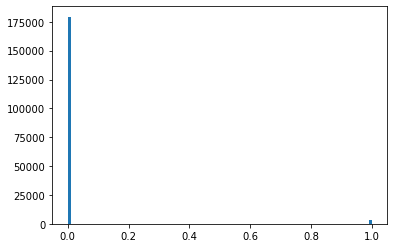

In [99]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0,1))

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.127e+03, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

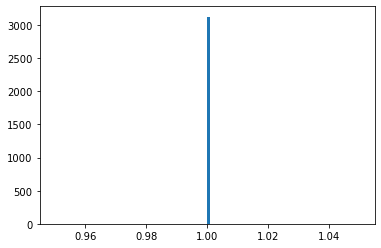

In [100]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([1.79415e+05, 2.60000e+01, 2.80000e+01, 3.40000e+01, 9.00000e+00,
        4.00000e+00, 5.00000e+00, 1.30000e+01, 5.00000e+00, 5.00000e+00,
        6.00000e+00, 4.00000e+00, 7.00000e+00, 4.00000e+00, 2.00000e+00,
        6.00000e+00, 1.00000e+00, 2.00000e+00, 6.00000e+00, 3.00000e+00,
        3.13200e+03, 3.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00,
        0.00000e+00, 6.00000e+00, 3.00000e+00, 3.00000e+00, 2.00000e+00,
        2.00000e+00, 0.00000e+00, 3.00000e+00, 3.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 2.00000e+00, 4.00000e+00, 1.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 4.00000e+00, 0.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00, 1.00000e+00,
        0.00000e+00, 2.00000e+00, 2.00000e+00, 1.00

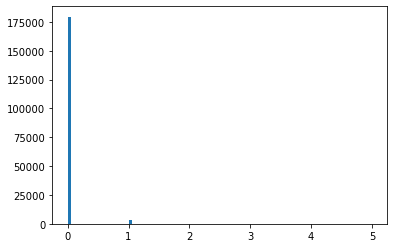

In [101]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0,5))

(array([8., 0., 4., 6., 6., 3., 4., 3., 3., 2., 5., 5., 4., 3., 5., 2., 4.,
        3., 0., 3., 2., 2., 3., 3., 2., 2., 3., 5., 5., 3., 3., 2., 2., 1.,
        3., 0., 0., 6., 2., 4., 2., 2., 1., 0., 4., 2., 0., 0., 1., 2., 1.,
        0., 0., 1., 4., 1., 3., 5., 2., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 2., 0., 2., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
        2., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.]),
 array([ 1.00001  ,  1.0900099,  1.1800098,  1.2700098,  1.3600096,
         1.4500095,  1.5400094,  1.6300093,  1.7200092,  1.8100091,
         1.900009 ,  1.990009 ,  2.0800087,  2.1700087,  2.2600086,
         2.3500085,  2.4400084,  2.5300083,  2.6200082,  2.7100081,
         2.800008 ,  2.890008 ,  2.980008 ,  3.0700078,  3.1600077,
         3.2500074,  3.3400073,  3.4300072,  3.5200071,  3.610007 ,
         3.700007 ,  3.7900069,  3.8800068,  3.9700067,  4.0600066,
         4.1500063,  4.2400064,  4.330006 ,  4.4200063,  4.510006 ,
      

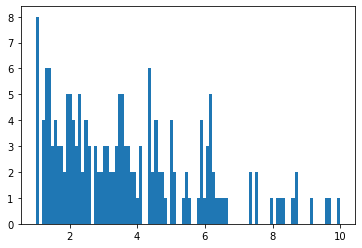

In [102]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(1.00001,10))

(array([9., 3., 4., 3., 7., 3., 5., 8., 5., 5., 5., 7., 4., 8., 4., 6., 9.,
        8., 6., 5., 7., 0., 0., 1., 1., 0., 1., 0., 2., 1., 2., 0., 0., 2.,
        1., 4., 0., 2., 3., 4., 1., 1., 0., 2., 1., 0., 3., 0., 0., 2., 1.,
        1., 2., 0., 2., 0., 1., 1., 2., 0., 0., 0., 3., 1., 3., 1., 0., 1.,
        0., 2., 0., 0., 0., 1., 1., 0., 0., 0., 3., 3., 0., 0., 0., 1., 0.,
        1., 0., 0., 1., 0., 2., 0., 1., 1., 2., 0., 2., 0., 1., 0.]),
 array([1.0000000e-06, 1.0000989e-02, 2.0000977e-02, 3.0000968e-02,
        4.0000957e-02, 5.0000943e-02, 6.0000934e-02, 7.0000924e-02,
        8.0000915e-02, 9.0000898e-02, 1.0000089e-01, 1.1000088e-01,
        1.2000087e-01, 1.3000086e-01, 1.4000085e-01, 1.5000084e-01,
        1.6000083e-01, 1.7000081e-01, 1.8000080e-01, 1.9000079e-01,
        2.0000078e-01, 2.1000077e-01, 2.2000076e-01, 2.3000075e-01,
        2.4000074e-01, 2.5000072e-01, 2.6000071e-01, 2.7000070e-01,
        2.8000069e-01, 2.9000068e-01, 3.0000067e-01, 3.1000066e-01,
      

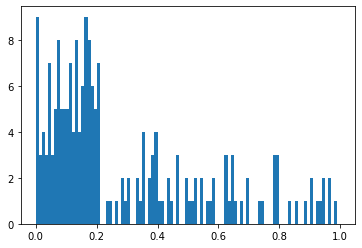

In [103]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(0.000001,0.9999999))

(array([     0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0., 125125.,  40617.,  18448.,  10432.,   6906.,   5431.,
      

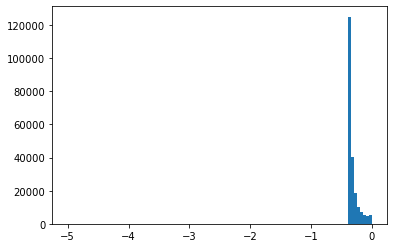

In [104]:
plt.hist(first_npf_stuff[interesting_variable],bins=100,range=(-5,-0.00001))

In [105]:
np.sum(np.array([  2.,   3.,   0.,   1.,   1.,   0.,  16.,  81., 116., 156., 201.,
        231., 238., 269., 268., 271., 301., 341., 347., 394., 381., 375.,
        420., 427., 427., 485., 491., 492., 422., 435., 401., 366., 342.,
        342., 290., 279., 262., 233., 200., 197., 184., 170., 163., 129.,
        132., 113., 105.,  84., 102.,  95.,  80.,  79., 100.,  83.,  61.,
         74.,  69.,  72.,  52.,  63.,  50.,  52.,  45.,  46.,  34.,  34.,
         25.,  18.,  22.,  22.,  17.,  14.,  16.,  10.,   9.,   7.,   1.,
          3.,   5.,   2.,   1.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]))

12953.0

In [106]:
12956

12956

(array([3.99885e+05, 3.30000e+01, 2.10000e+01, 9.00000e+00, 1.20000e+01,
        5.00000e+00, 6.00000e+00, 3.00000e+00, 3.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 4.00000e+00, 2.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

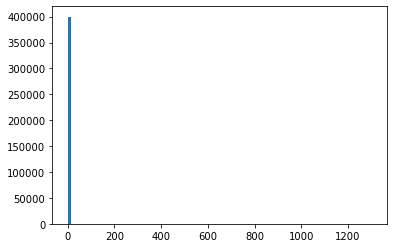

In [107]:
plt.hist(first_npf_stuff[interesting_variable],bins=100)

In [108]:
first_vtx_stuff = ak.to_numpy(df_vtx_clip[:,0])

In [109]:
df_vtx_clip[0,:5]

<Record ... 0.263, 0.0436, None, None, None]} type='{"sv_pt": 5 * ?float32, "sv_...'>

In [110]:
first_vtx_stuff

array([(40.92438  , -0.42304367, 1.7769272, -0.4966538 , -0.42311645, 4., 4.098559  , 0.85899377, 1.0513455 , 49.267982 , 2.7619932 , 49.520184 , 0.99997705, 0.26288605),
       (17.476078 , -0.3488841 , 0.9189258, -0.49679303, -0.34891814, 3., 4.633194  , 1.8092972 , 0.35758275,  6.3204107, 0.80146766,  6.3231845, 0.9999425 , 0.34145305),
       ( 4.3416257, -0.19063433, 0.9090243, -0.29598433, -0.26743877, 2., 0.08055659, 0.08562515, 0.02706654,  2.3187418, 0.03502447,  2.3626354, 0.97801346, 0.03202774),
       ...,
       (13.906122 , -0.4101109 , 1.9588983, -0.4977964 , -0.4101379 , 6., 4.278945  , 0.4910895 , 0.06541351,  4.3136578, 0.07457376,  4.3763065, 0.99885696, 0.6304855 ),
       ( 6.1343594, -0.3176431 , 0.5850642, -0.33692834, -0.41838098, 2., 0.29547176, 0.3161494 , 0.05631754,  2.0200331, 0.05790783,  2.0246084, 0.99778384, 0.2524571 ),
       ( 0.       ,  0.        , 0.       ,  0.        ,  0.        , 0., 0.        , 0.        , 0.        ,  0.       , 0.        ,

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1000.   ,  -999.985,  -999.97 ,  -999.955,  -999.94 ,  -999.925,
         -999.91 ,  -999.895,  -999.88 ,  -999.865,  -999.85 ,  -999.835,
         -999.82 ,  -999.805,  -999.79 ,  -999.775,  -999.76 ,  -999.745,
         -999.73 ,  -999.715,  -999.7  ,  -999.685,  -999.67 ,  -999.655,
         -999.64 ,  -999.625,  -999.61 ,  -999.595,  -999.58 ,  -999.565,
         -999.55 ,  -999.535,  -999.52 ,  -999.505,  -999.49 ,  -999.475,
         -999.46 ,  -999.445,  -999.43 ,  -999.415,  -999.4  ,  -999.385,
         -999.37 ,  -999.355,  -

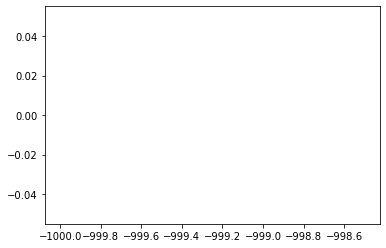

In [111]:
interesting_variable = 'sv_enratio'
#plt.hist(first_cpf_stuff[interesting_variable],bins=100)
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-1000,-998.5))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 93085.]),
 array([-1.01  , -0.9999, -0.9898, -0.9797, -0.9696, -0.9595, -0.9494,
        -0.9393, -0.929

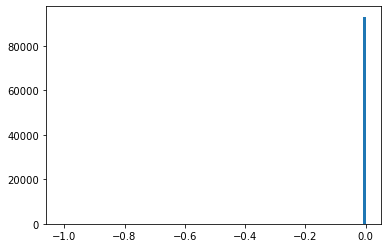

In [112]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-1.01,0))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 93085.]),
 array([-0.4  , -0.396, -0.392, -0.388, -0.384, -0.38 , -0.376, -0.372,
        -0.368, -0.364

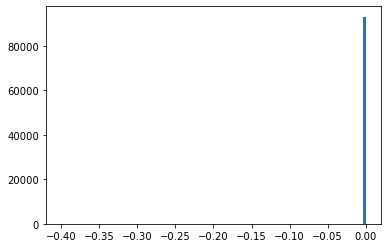

In [113]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-0.40,0))

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0., 93085.]),
 array([-0.6  , -0.594, -0.588, -0.582, -0.576, -0.57 , -0.564, -0.558,
        -0.552, -0.546

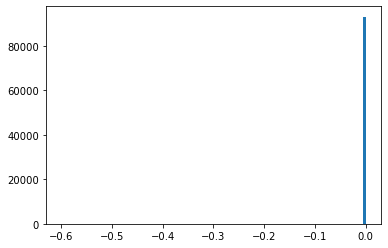

In [114]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-0.60,0))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-1.01  , -1.0098, -1.0096, -1.0094, -1.0092, -1.009 , -1.0088,
        -1.0086, -1.0084, -1.0082, -1.008 , -1.0078, -1.0076, -1.0074,
        -1.0072, -1.007 , -1.0068, -1.0066, -1.0064, -1.0062, -1.006 ,
        -1.0058, -1.0056, -1.0054, -1.0052, -1.005 , -1.0048, -1.0046,
        -1.0044, -1.0042, -1.004 , -1.0038, -1.0036, -1.0034, -1.0032,
        -1.003 , -1.0028, -1.0026, -1.0024, -1.0022, -1.002 , -1.0018,
        -1.0016, -1.0014, -1.0012, -1.001 , -1.0008, -1.0006, -1.0004,
        -1.0002, -1.    , -0.9998, -0.9996, -0.9994, 

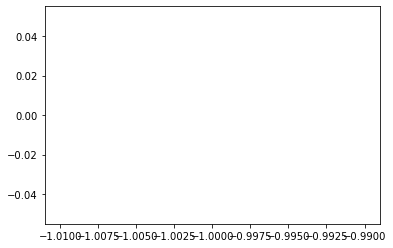

In [115]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-1.01,-0.99))

(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.86142e+05, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00,
        9.00000e+00, 1.00000e+01, 2.00000e+01, 3.60000e+01, 4.80000e+01,
        5.00000e+01, 8.90000e+01, 1.00000e+02, 1.06000e+02, 1.33000e+02,
        1.67000e+02, 1.58000e+02, 1.61000e+02, 1.84

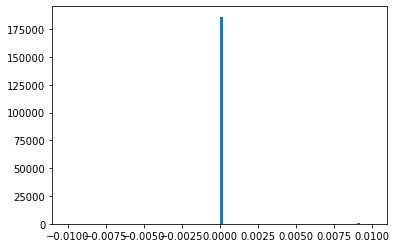

In [116]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-0.01,0.01))

(array([1.94613e+05, 1.11290e+04, 9.93100e+03, 8.64900e+03, 7.91400e+03,
        7.32300e+03, 6.67700e+03, 6.53900e+03, 6.07500e+03, 5.75500e+03,
        5.62400e+03, 5.38300e+03, 5.08800e+03, 4.90400e+03, 4.65200e+03,
        4.60800e+03, 4.34800e+03, 4.06900e+03, 4.13200e+03, 3.73400e+03,
        3.63400e+03, 3.43200e+03, 3.51800e+03, 3.42600e+03, 3.14400e+03,
        3.08700e+03, 3.04700e+03, 2.81600e+03, 2.71700e+03, 2.56500e+03,
        2.56300e+03, 2.43600e+03, 2.40000e+03, 2.35000e+03, 2.13300e+03,
        2.08100e+03, 2.07300e+03, 1.87000e+03, 1.80300e+03, 1.83400e+03,
        1.75100e+03, 1.66100e+03, 1.55600e+03, 1.49600e+03, 1.44300e+03,
        1.42400e+03, 1.34500e+03, 1.31600e+03, 1.23800e+03, 1.19000e+03,
        1.08300e+03, 1.11400e+03, 1.03800e+03, 9.86000e+02, 8.86000e+02,
        8.58000e+02, 8.56000e+02, 8.52000e+02, 8.32000e+02, 7.25000e+02,
        6.68000e+02, 6.48000e+02, 6.44000e+02, 6.00000e+02, 5.83000e+02,
        5.26000e+02, 5.02000e+02, 4.83000e+02, 4.69

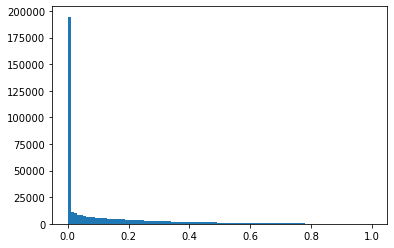

In [117]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0,1))

(array([ 7.,  3.,  9., 10., 11.,  4.,  8.,  5.,  9.,  3., 10.,  8., 11.,
         6.,  2.,  6.,  3.,  7.,  8.,  9.,  9.,  4., 11.,  6.,  1., 10.,
         8.,  5.,  8.,  3.,  3.,  4.,  2.,  3.,  7.,  2., 13.,  4.,  5.,
         4.,  2.,  7.,  3.,  8.,  6.,  1.,  3.,  1.,  2.,  5.,  8.,  5.,
         3.,  3.,  1.,  3.,  3.,  5.,  6.,  2.,  1.,  8.,  5.,  3.,  4.,
         6.,  3.,  2.,  3.,  6.,  2.,  2.,  4.,  1.,  2.,  1.,  4.,  4.,
         4.,  2.,  5.,  2.,  0.,  5.,  3.,  3.,  3.,  3.,  1.,  2.,  2.,
         1.,  5.,  1.,  4.,  5.,  1.,  1.,  2.,  3.]),
 array([0.95 , 0.951, 0.952, 0.953, 0.954, 0.955, 0.956, 0.957, 0.958,
        0.959, 0.96 , 0.961, 0.962, 0.963, 0.964, 0.965, 0.966, 0.967,
        0.968, 0.969, 0.97 , 0.971, 0.972, 0.973, 0.974, 0.975, 0.976,
        0.977, 0.978, 0.979, 0.98 , 0.981, 0.982, 0.983, 0.984, 0.985,
        0.986, 0.987, 0.988, 0.989, 0.99 , 0.991, 0.992, 0.993, 0.994,
        0.995, 0.996, 0.997, 0.998, 0.999, 1.   , 1.001, 1.002, 1.003,
        

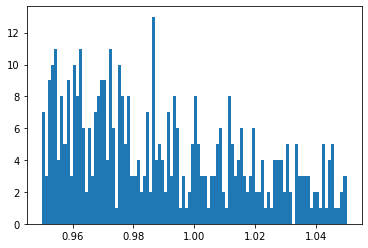

In [118]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.95,1.05))

(array([2.32236e+05, 3.23690e+04, 2.56510e+04, 2.08910e+04, 1.71540e+04,
        1.42320e+04, 1.18820e+04, 9.66100e+03, 7.90700e+03, 6.51300e+03,
        5.10700e+03, 4.12300e+03, 3.14300e+03, 2.45700e+03, 1.83400e+03,
        1.40400e+03, 9.49000e+02, 6.70000e+02, 4.69000e+02, 2.89000e+02,
        1.58000e+02, 1.14000e+02, 7.50000e+01, 7.30000e+01, 6.40000e+01,
        5.20000e+01, 4.30000e+01, 4.10000e+01, 2.90000e+01, 3.70000e+01,
        2.50000e+01, 1.80000e+01, 1.90000e+01, 1.60000e+01, 1.80000e+01,
        1.60000e+01, 1.10000e+01, 1.80000e+01, 1.10000e+01, 1.10000e+01,
        6.00000e+00, 1.30000e+01, 1.10000e+01, 8.00000e+00, 4.00000e+00,
        6.00000e+00, 7.00000e+00, 9.00000e+00, 8.00000e+00, 5.00000e+00,
        4.00000e+00, 6.00000e+00, 5.00000e+00, 4.00000e+00, 5.00000e+00,
        3.00000e+00, 4.00000e+00, 2.00000e+00, 2.00000e+00, 9.00000e+00,
        1.00000e+00, 3.00000e+00, 3.00000e+00, 1.00000e+00, 3.00000e+00,
        1.00000e+00, 3.00000e+00, 2.00000e+00, 5.00

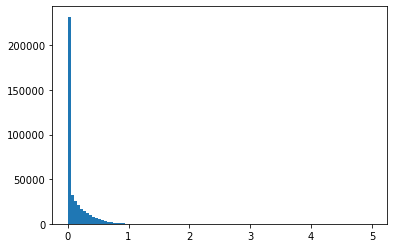

In [119]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0,5))

(array([246., 146., 108.,  80.,  63.,  56.,  32.,  35.,  30.,  25.,  20.,
         20.,  13.,  12.,  12.,  17.,   8.,   7.,  10.,   7.,   6.,  10.,
          3.,   5.,   4.,   4.,   5.,   5.,   4.,   3.,   1.,   6.,   2.,
          1.,   3.,   4.,   4.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   3.,   2.,   1.,   2.,   2.,   3.,   1.,   1.,   0.,   1.,
          1.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([ 1.00001  ,  1.0900099,  1.1800098,  1.2700098,  1.3600096,
         1.4500095,  1.5400094,  1.6300093,  1.7200092,  1.8100091,
         1.900009 ,  1.990009 ,  2.0800087,  2.1700087,  2.2600086,
         2.3500085,  2.4400084,  2.5300083,  2.6200082,  2.7100081,
         2.800008 ,  2.890008 ,  2.980008 ,  3

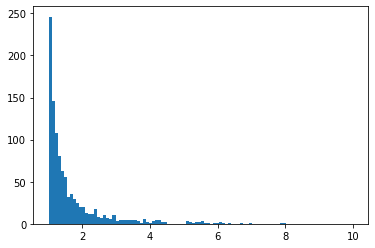

In [120]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(1.00001,10))

(array([29., 14.,  6.,  6.,  2.,  5.,  2.,  3.,  3.,  2.,  2.,  4.,  0.,
         0.,  1.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 1.00001  ,  1.0900099,  1.1800098,  1.2700098,  1.3600096,
         1.4500095,  1.5400094,  1.6300093,  1.7200092,  1.8100091,
         1.900009 ,  1.990009 ,  2.0800087,  2.1700087,  2.2600086,
         2.3500085,  2.4400084,  2.5300083,  2.6200082,  2.7100081,
         2.800008 ,  2.890008 ,  2.980008 ,  3.0700078,  3.1600077,
         3.2500074,  3.3400073,  3.4300072,  3.5200071,  3.610007 ,
         3.700007 ,  3.790

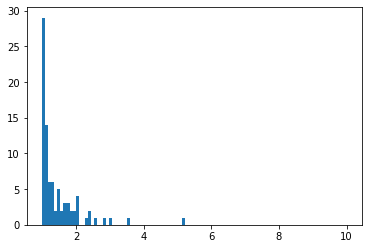

In [121]:
plt.hist(first_vtx_stuff[interesting_variable][hflav == 4],bins=100,range=(1.00001,10))

(array([841., 122.,  42.,  16.,  16.,   6.,   2.,   1.,   0.,   0.,   2.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([  1.00001  ,   1.9900099,   2.9800098,   3.9700098,   4.9600096,
          5.9500093,   6.9400096,   7.9300094,   8.92001  ,   9.910009 ,
         10.900009 ,  11.890009 ,  12.880009 ,  13.870008 ,  14.860008 ,
         15.850009 ,  16.840008 ,  17.830008 ,  18.820007 ,  19.810009 ,
         20.800009 ,  21.7

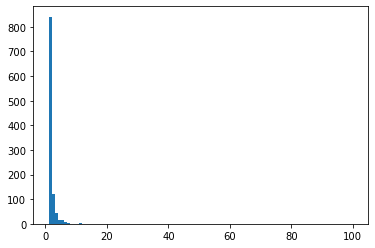

In [122]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(1.00001,100))

(array([ 8474., 11127.,  9930.,  8651.,  7912.,  7323.,  6677.,  6539.,
         6076.,  5754.,  5624.,  5383.,  5090.,  4902.,  4653.,  4607.,
         4348.,  4070.,  4131.,  3734.,  3634.,  3432.,  3520.,  3424.,
         3145.,  3086.,  3048.,  2815.,  2717.,  2565.,  2563.,  2436.,
         2401.,  2349.,  2133.,  2081.,  2073.,  1870.,  1803.,  1834.,
         1751.,  1661.,  1556.,  1496.,  1443.,  1424.,  1345.,  1316.,
         1238.,  1190.,  1083.,  1114.,  1038.,   986.,   886.,   858.,
          856.,   852.,   832.,   725.,   668.,   648.,   644.,   600.,
          583.,   526.,   502.,   483.,   469.,   477.,   401.,   440.,
          367.,   311.,   315.,   314.,   309.,   290.,   240.,   251.,
          224.,   201.,   184.,   183.,   157.,   170.,   129.,   125.,
          133.,   113.,   127.,   107.,    84.,    69.,    82.,    69.,
           70.,    65.,    47.,    37.]),
 array([1.0000000e-06, 1.0000989e-02, 2.0000977e-02, 3.0000968e-02,
        4.0000957e-02, 5.0

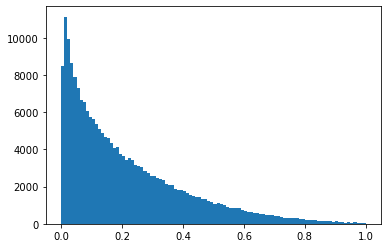

In [123]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.000001,0.9999999))

(array([   3.,  124.,  479.,  829., 1048., 1105., 1224., 1180., 1232.,
        1250., 1151., 1160., 1150., 1174., 1140., 1125., 1068., 1067.,
        1058., 1034., 1101., 1050., 1014., 1024., 1020.,  997.,  985.,
         908.,  931.,  900.,  868.,  900.,  916.,  879.,  855.,  854.,
         864.,  837.,  836.,  842.,  829.,  809.,  819.,  793.,  817.,
         736.,  767.,  774.,  787.,  781.,  812.,  716.,  733.,  722.,
         754.,  736.,  733.,  672.,  743.,  702.,  721.,  639.,  681.,
         677.,  640.,  643.,  670.,  690.,  677.,  639.,  678.,  649.,
         642.,  692.,  647.,  690.,  630.,  596.,  665.,  650.,  568.,
         575.,  593.,  601.,  662.,  613.,  631.,  617.,  607.,  608.,
         627.,  576.,  616.,  576.,  535.,  577.,  597.,  549.,  557.,
         545.]),
 array([1.000000e-06, 1.000990e-03, 2.000980e-03, 3.000970e-03,
        4.000960e-03, 5.000950e-03, 6.000940e-03, 7.000930e-03,
        8.000920e-03, 9.000910e-03, 1.000090e-02, 1.100089e-02,
        1.

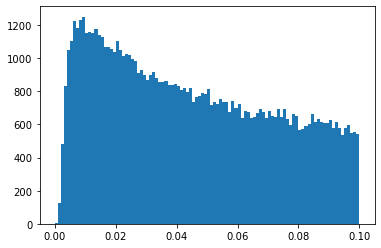

In [124]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.000001,0.1))

(array([ 0.,  5., 11., 25., 35., 36., 62., 34., 35., 52., 50., 41., 44.,
        48., 51., 57., 67., 49., 55., 63., 61., 70., 62., 59., 59., 53.,
        59., 52., 62., 61., 59., 63., 64., 56., 53., 64., 65., 66., 53.,
        69., 53., 72., 54., 84., 61., 59., 62., 80., 84., 74., 76., 57.,
        58., 61., 74., 55., 74., 55., 78., 68., 59., 63., 69., 68., 57.,
        53., 52., 71., 64., 58., 74., 55., 65., 72., 78., 71., 66., 55.,
        60., 74., 63., 66., 70., 55., 76., 63., 87., 74., 70., 62., 72.,
        66., 73., 64., 61., 82., 82., 66., 72., 75.]),
 array([1.000000e-06, 1.000990e-03, 2.000980e-03, 3.000970e-03,
        4.000960e-03, 5.000950e-03, 6.000940e-03, 7.000930e-03,
        8.000920e-03, 9.000910e-03, 1.000090e-02, 1.100089e-02,
        1.200088e-02, 1.300087e-02, 1.400086e-02, 1.500085e-02,
        1.600084e-02, 1.700083e-02, 1.800082e-02, 1.900081e-02,
        2.000080e-02, 2.100079e-02, 2.200078e-02, 2.300077e-02,
        2.400076e-02, 2.500075e-02, 2.600074e-02, 

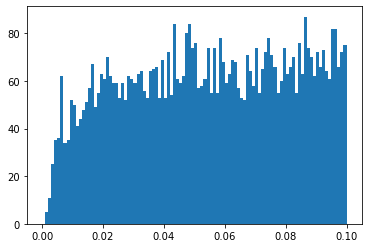

In [125]:
plt.hist(first_vtx_stuff[interesting_variable][hflav == 5],bins=100,range=(0.000001,0.1))

In [126]:
hFlav = ak.to_numpy(ak.flatten(hflav, axis=0))

In [127]:
hFlav

array([5, 4, 0, ..., 0, 0, 0], dtype=int32)

(array([ 8474., 11127.,  9930.,  8651.,  7912.,  7323.,  6677.,  6539.,
         6076.,  5754.,  5624.,  5383.,  5090.,  4902.,  4653.,  4607.,
         4348.,  4070.,  4131.,  3734.,  3634.,  3432.,  3520.,  3424.,
         3145.,  3086.,  3048.,  2815.,  2717.,  2565.,  2563.,  2436.,
         2401.,  2349.,  2133.,  2081.,  2073.,  1870.,  1803.,  1834.,
         1751.,  1661.,  1556.,  1496.,  1443.,  1424.,  1345.,  1316.,
         1238.,  1190.,  1083.,  1114.,  1038.,   986.,   886.,   858.,
          856.,   852.,   832.,   725.,   668.,   648.,   644.,   600.,
          583.,   526.,   502.,   483.,   469.,   477.,   401.,   440.,
          367.,   311.,   315.,   314.,   309.,   290.,   240.,   251.,
          224.,   201.,   184.,   183.,   157.,   170.,   129.,   125.,
          133.,   113.,   127.,   107.,    84.,    69.,    82.,    69.,
           70.,    65.,    47.,    37.]),
 array([1.0000000e-06, 1.0000989e-02, 2.0000977e-02, 3.0000968e-02,
        4.0000957e-02, 5.0

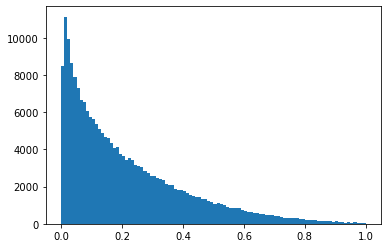

In [128]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(0.000001,0.9999999))

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-5.0000000e+00, -4.9500003e+00, -4.9000001e+00, -4.8500004e+00,
        -4.8000002e+00, -4.7500005e+00, -4.7000008e+00, -4.6500006e+00,
        -4.6000009e+00, -4.5500007e+00, -4.5000010e+00, -4.4500012e+00,
        -4.4000010e+00, -4.3500013e+00, -4.3000016e+00, -4.2500014e+00,
        -4.2000017e+00, -4.1500015e+00, -4.1000018e+00, -4.0500021e+00,
        -4.0000019e+00, -3.9500022e+00, -3.9000022e+00, -3.8500023e+00,
        -3.8000023e+00, -3.7500024e+00, -3.7000027e+00, -3.6500027e+00,
        -3.6000028e+00, -3.5500028e+00, -3.500

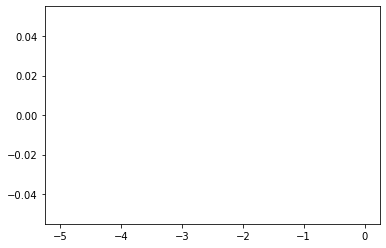

In [129]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100,range=(-5,-0.00001))

In [130]:
np.sum(np.array([  2.,   3.,   0.,   1.,   1.,   0.,  16.,  81., 116., 156., 201.,
        231., 238., 269., 268., 271., 301., 341., 347., 394., 381., 375.,
        420., 427., 427., 485., 491., 492., 422., 435., 401., 366., 342.,
        342., 290., 279., 262., 233., 200., 197., 184., 170., 163., 129.,
        132., 113., 105.,  84., 102.,  95.,  80.,  79., 100.,  83.,  61.,
         74.,  69.,  72.,  52.,  63.,  50.,  52.,  45.,  46.,  34.,  34.,
         25.,  18.,  22.,  22.,  17.,  14.,  16.,  10.,   9.,   7.,   1.,
          3.,   5.,   2.,   1.,   2.,   0.,   0.,   2.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]))

12953.0

In [131]:
12956

12956

(array([3.15461e+05, 5.26510e+04, 2.19100e+04, 7.45700e+03, 1.64500e+03,
        3.25000e+02, 1.67000e+02, 8.90000e+01, 6.50000e+01, 4.30000e+01,
        3.00000e+01, 2.80000e+01, 2.30000e+01, 1.40000e+01, 1.20000e+01,
        8.00000e+00, 1.20000e+01, 8.00000e+00, 5.00000e+00, 8.00000e+00,
        7.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 4.00000e+00,
        5.00000e+00, 3.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

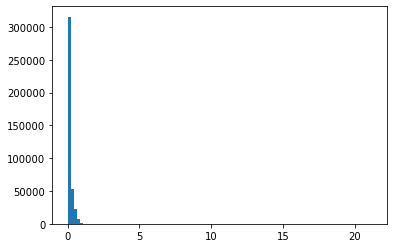

In [132]:
plt.hist(first_vtx_stuff[interesting_variable],bins=100)

In [133]:
df_vtx_clip.type

400000 * {"sv_pt": 5 * ?float32, "sv_deltaR": 5 * ?float32, "sv_mass": 5 * ?float32, "sv_etarel": 5 * ?float32, "sv_phirel": 5 * ?float32, "sv_ntracks": 5 * ?float32, "sv_chi2": 5 * ?float32, "sv_normchi2": 5 * ?float32, "sv_dxy": 5 * ?float32, "sv_dxysig": 5 * ?float32, "sv_d3d": 5 * ?float32, "sv_d3dsig": 5 * ?float32, "sv_costhetasvpv": 5 * ?float32, "sv_enratio": 5 * ?float32}

In [134]:
df_vtx_pts_clip.type

400000 * {"sv_pt": 5 * ?float32, "sv_eta": 5 * ?float32, "sv_phi": 5 * ?float32, "sv_e": 5 * ?float32}

In [135]:
def quantile_min_max(feature,group='glob',candidate=None):
    if group=='glob':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_glob[feature])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='cpf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_cpf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='npf_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_npf_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])
    elif group=='vtx_pts':
        print(feature,group,candidate)
        array_np = ak.to_numpy(df_vtx_pts_clip[feature][:,candidate])
        array_np = np.where(array_np == -999, 0, array_np)
        array_np = np.where(array_np ==   -1, 0, array_np)
        mini, maxi = np.quantile(array_np,0.01),np.quantile(array_np,0.99)
        mini_, maxi_ = np.quantile(array_np,0.2),np.quantile(array_np,0.8)
        return [mini, maxi], np.std(array_np[(array_np >= mini_) & (array_np <= maxi_)])

In [141]:
print(quantile_min_max('jet_pt','glob'))

jet_pt glob None
([16.459981155395507, 1414.295871582032], 111.07198)


In [142]:
print(quantile_min_max('Cpfcan_BtagPf_trackEtaRel','cpf',1))

Cpfcan_BtagPf_trackEtaRel cpf 1
([8.856159911553676e-40, 6.363592338562011], 0.49901962)


In [143]:
global_epsilons = np.zeros(len(global_branches))

In [144]:
global_standardized_epsilons = np.zeros(len(global_branches))

In [145]:
global_ranges = np.zeros((len(global_branches),2))

In [146]:
for (i,key) in enumerate(global_branches):
    range_inputs, standardized_epsilon = quantile_min_max(key,'glob')
    scale_epsilon = (range_inputs[1] - range_inputs[0])/2
    global_epsilons[i] = scale_epsilon
    global_standardized_epsilons[i] = standardized_epsilon
    global_ranges[i] = range_inputs
    print(range_inputs, scale_epsilon, standardized_epsilon)

jet_pt glob None
[16.459981155395507, 1414.295871582032] 698.9179452133183 111.07198
jet_eta glob None
[-2.352190861701965, 2.3510114169120793] 2.3516011393070224 0.6144125
nCpfcand glob None
[1.0, 37.0] 18.0 3.2007327
nNpfcand glob None
[0.0, 21.0] 10.5 2.1740932
nsv glob None
[0.0, 4.0] 2.0 0.4945744
npv glob None
[12.0, 50.0] 19.0 4.4131637
TagVarCSV_trackSumJetEtRatio glob None
[0.02825362008064986, 1.0615710473060616] 0.5166587136127059 0.10230581
TagVarCSV_trackSumJetDeltaR glob None
[0.0007345966692082584, 0.164808406084776] 0.08203690470778388 0.010657664
TagVarCSV_vertexCategory glob None
[0.0, 2.0] 1.0 0.9510462
TagVarCSV_trackSip2dValAboveCharm glob None
[-0.011660193540155886, 0.03650391310453415] 0.024082053322345018 0.0009755603
TagVarCSV_trackSip2dSigAboveCharm glob None
[-2.6668770503997803, 13.920680084228517] 8.293778567314149 0.4077643
TagVarCSV_trackSip3dValAboveCharm glob None
[-0.02534973133355379, 0.06414226293563856] 0.04474599713459618 0.0018973991
TagVarCSV_tr

In [147]:
global_ranges

array([[ 1.64599812e+01,  1.41429587e+03],
       [-2.35219086e+00,  2.35101142e+00],
       [ 1.00000000e+00,  3.70000000e+01],
       [ 0.00000000e+00,  2.10000000e+01],
       [ 0.00000000e+00,  4.00000000e+00],
       [ 1.20000000e+01,  5.00000000e+01],
       [ 2.82536201e-02,  1.06157105e+00],
       [ 7.34596669e-04,  1.64808406e-01],
       [ 0.00000000e+00,  2.00000000e+00],
       [-1.16601935e-02,  3.65039131e-02],
       [-2.66687705e+00,  1.39206801e+01],
       [-2.53497313e-02,  6.41422629e-02],
       [-5.58748749e+00,  2.25655064e+01],
       [ 0.00000000e+00,  1.80000000e+01],
       [ 0.00000000e+00,  1.00000000e+01]])

In [148]:
cpf_epsilons = np.zeros((len(cpf_branches),25))

In [149]:
cpf_standardized_epsilons = np.zeros((len(cpf_branches),25))

In [150]:
cpf_ranges = np.zeros((len(cpf_branches),25, 2))

In [151]:
for (i,key) in enumerate(cpf_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'cpf',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        cpf_epsilons[i,cand] = scale_epsilon
        cpf_standardized_epsilons[i,cand] = standardized_epsilon
        cpf_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Cpfcan_BtagPf_trackEtaRel cpf 0
[1.6651761496067046, 6.3433350515365605] 2.339079450964928 0.46418646
Cpfcan_BtagPf_trackEtaRel cpf 1
[8.856159911553676e-40, 6.363592338562011] 3.1817961692810055 0.49901962
Cpfcan_BtagPf_trackEtaRel cpf 2
[0.0, 6.41470353603363] 3.207351768016815 0.5224831
Cpfcan_BtagPf_trackEtaRel cpf 3
[0.05973452862352134, 6.453858494758608] 3.197061983067543 0.50915945
Cpfcan_BtagPf_trackEtaRel cpf 4
[0.01903676759451628, 6.44481631278992] 3.2128897725977015 0.51088244
Cpfcan_BtagPf_trackEtaRel cpf 5
[0.008341286079958083, 6.435746254920961] 3.2137024844205015 0.5117444
Cpfcan_BtagPf_trackEtaRel cpf 6
[0.0, 6.389243311882019] 3.1946216559410097 1.2947544
Cpfcan_BtagPf_trackEtaRel cpf 7
[0.0, 6.318741564750676] 3.159370782375338 1.4413009
Cpfcan_BtagPf_trackEtaRel cpf 8
[0.0, 6.275682821273805] 3.1378414106369026 1.4315436
Cpfcan_BtagPf_trackEtaRel cpf 9
[0.0, 6.179782528877258] 3.089891264438629 1.3186167
Cpfcan_BtagPf_trackEtaRel cpf 10
[0.0, 6.099581742286684] 3.

In [152]:
npf_epsilons = np.zeros((len(npf_branches),25))

In [153]:
npf_standardized_epsilons = np.zeros((len(npf_branches),25))

In [154]:
npf_ranges = np.zeros((len(npf_branches),25, 2))

In [155]:
for (i,key) in enumerate(npf_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'npf',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        npf_epsilons[i,cand] = scale_epsilon
        npf_standardized_epsilons[i,cand] = standardized_epsilon
        npf_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Npfcan_ptrel npf 0
[-0.9968633687496186, 7.464285880050677e-40] 0.4984316843748093 0.07358483
Npfcan_ptrel npf 1
[-0.997913658618927, 0.008142720190808177] 0.5030281894048676 0.0339262
Npfcan_ptrel npf 2
[-0.9984375846385956, 0.0025565026071853957] 0.5004970436228905 0.022131281
Npfcan_ptrel npf 3
[-0.9985952377319336, 2.4447950680407006e-39] 0.4992976188659668 0.42498827
Npfcan_ptrel npf 4
[-0.9986761224269868, 2.9553105193696606e-39] 0.4993380612134934 0.47400758
Npfcan_ptrel npf 5
[-0.9987334609031677, 2.6967991748528036e-40] 0.49936673045158386 0.480441
Npfcan_ptrel npf 6
[-0.9987463372945785, 2.7103357180181813e-40] 0.49937316864728926 0.44453526
Npfcan_ptrel npf 7
[-0.9987475889921189, 2.7207191995089816e-40] 0.49937379449605945 0.37424433
Npfcan_ptrel npf 8
[-0.9987351304292679, 0.6544852882623673] 0.8266102093458176 0.27936345
Npfcan_ptrel npf 9
[-0.9986952543258667, 0.6537269240617752] 0.826211089193821 0.19356798
Npfcan_ptrel npf 10
[-0.9986532968282699, 0.6533978629112244] 0

In [156]:
vtx_epsilons = np.zeros((len(vtx_branches),5))

In [157]:
vtx_standardized_epsilons = np.zeros((len(vtx_branches),5))

In [158]:
vtx_ranges = np.zeros((len(vtx_branches),5, 2))

In [159]:
for (i,key) in enumerate(vtx_branches):
    for cand in range(5):
        range_inputs, standardized_epsilon = quantile_min_max(key,'vtx',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        vtx_epsilons[i,cand] = scale_epsilon
        vtx_standardized_epsilons[i,cand] = standardized_epsilon
        vtx_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

sv_pt vtx 0
[0.0, 285.0325842285157] 142.51629211425785 7.441725
sv_pt vtx 1
[0.0, 306.53417083740237] 153.26708541870119 9.256982
sv_pt vtx 2
[0.0, 314.7414782714844] 157.3707391357422 10.284605
sv_pt vtx 3
[0.0, 317.2212841796878] 158.6106420898439 10.685772
sv_pt vtx 4
[0.0, 317.63570098876966] 158.81785049438483 10.85317
sv_deltaR vtx 0
[-0.49694663971662517, 4.121541362485775e-40] 0.24847331985831259 0.19874609
sv_deltaR vtx 1
[-0.49415895342826843, 0.06452108159661293] 0.2793400175124407 0.10615186
sv_deltaR vtx 2
[-0.48711838722229006, 0.05470199991017629] 0.2709101935662332 0.0020843395
sv_deltaR vtx 3
[-0.4584965601563454, 0.010895682685077198] 0.23469612142071128 0.00028885732
sv_deltaR vtx 4
[0.0, 0.010515761300921453] 0.0052578806504607264 0.00029516398
sv_mass vtx 0
[0.0, 10.339711933136] 5.169855966568 0.44771332
sv_mass vtx 1
[0.0, 12.393943815231324] 6.196971907615662 0.51221937
sv_mass vtx 2
[0.0, 13.175008916854871] 6.587504458427436 0.55090326
sv_mass vtx 3
[0.0, 13.

In [160]:
cpf_pts_epsilons = np.zeros((len(cpf_pts_branches),25))

In [161]:
cpf_pts_standardized_epsilons = np.zeros((len(cpf_pts_branches),25))

In [162]:
cpf_pts_ranges = np.zeros((len(cpf_pts_branches),25, 2))

In [163]:
for (i,key) in enumerate(cpf_pts_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'cpf_pts',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        cpf_pts_epsilons[i,cand] = scale_epsilon
        cpf_pts_standardized_epsilons[i,cand] = standardized_epsilon
        cpf_pts_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Cpfcan_pt cpf_pts 0
[0.9677734375, 87.87562500000058] 43.45392578125029 1.4446652
Cpfcan_pt cpf_pts 1
[9.097372562840075e-40, 109.8125] 54.90625 1.9807967
Cpfcan_pt cpf_pts 2
[0.0, 124.375] 62.1875 2.2249932
Cpfcan_pt cpf_pts 3
[0.9521484375, 129.625] 64.33642578125 2.307941
Cpfcan_pt cpf_pts 4
[0.4097786843776703, 128.125] 63.857610657811165 2.3104591
Cpfcan_pt cpf_pts 5
[0.19071844220161438, 128.875] 64.34214077889919 2.264874
Cpfcan_pt cpf_pts 6
[0.0, 123.5625] 61.78125 2.3024862
Cpfcan_pt cpf_pts 7
[0.0, 116.875] 58.4375 2.1381013
Cpfcan_pt cpf_pts 8
[0.0, 112.3125] 56.15625 1.8277055
Cpfcan_pt cpf_pts 9
[0.0, 106.3125] 53.15625 1.5344535
Cpfcan_pt cpf_pts 10
[0.0, 98.125] 49.0625 1.2525698
Cpfcan_pt cpf_pts 11
[0.0, 89.75] 44.875 0.9735075
Cpfcan_pt cpf_pts 12
[0.0, 81.62562500000058] 40.81281250000029 0.7234209
Cpfcan_pt cpf_pts 13
[0.0, 75.9375] 37.96875 0.50129884
Cpfcan_pt cpf_pts 14
[0.0, 102.5] 51.25 1.6759075
Cpfcan_pt cpf_pts 15
[0.0, 118.25] 59.125 2.465322
Cpfcan_pt cpf_

In [164]:
npf_pts_epsilons = np.zeros((len(npf_pts_branches),25))

In [165]:
npf_pts_standardized_epsilons = np.zeros((len(npf_pts_branches),25))

In [166]:
npf_pts_ranges = np.zeros((len(npf_pts_branches),25, 2))

In [167]:
for (i,key) in enumerate(npf_pts_branches):
    for cand in range(25):
        range_inputs, standardized_epsilon = quantile_min_max(key,'npf_pts',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        npf_pts_epsilons[i,cand] = scale_epsilon
        npf_pts_standardized_epsilons[i,cand] = standardized_epsilon
        npf_pts_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

Npfcan_pt npf_pts 0
[0.0, 581.0] 290.5 14.346542
Npfcan_pt npf_pts 1
[0.9814453125, 435.0] 217.00927734375 4.895536
Npfcan_pt npf_pts 2
[0.7516387701034546, 162.75125000000116] 80.99980561494885 2.2259796
Npfcan_pt npf_pts 3
[0.0, 84.75] 42.375 1.2458557
Npfcan_pt npf_pts 4
[0.0, 49.8125] 24.90625 1.0133272
Npfcan_pt npf_pts 5
[0.0, 32.9375] 16.46875 0.79312927
Npfcan_pt npf_pts 6
[0.0, 23.015781250000146] 11.507890625000073 0.6035957
Npfcan_pt npf_pts 7
[0.0, 18.390625] 9.1953125 0.4292611
Npfcan_pt npf_pts 8
[0.0, 26.734375] 13.3671875 0.759663
Npfcan_pt npf_pts 9
[0.0, 31.984531250000146] 15.992265625000073 0.9061684
Npfcan_pt npf_pts 10
[0.0, 34.75] 17.375 0.98390925
Npfcan_pt npf_pts 11
[0.0, 37.1875] 18.59375 1.0478921
Npfcan_pt npf_pts 12
[2.453547073781426e-40, 8.0390625] 4.01953125 0.6017748
Npfcan_pt npf_pts 13
[0.00027508570929057896, 6.88671875] 3.4432218321453547 0.4982606
Npfcan_pt npf_pts 14
[0.0059150224551558495, 5.65234375] 2.823214363772422 0.35565117
Npfcan_pt npf_p

In [168]:
vtx_pts_epsilons = np.zeros((len(vtx_pts_branches),5))

In [169]:
vtx_pts_standardized_epsilons = np.zeros((len(vtx_pts_branches),5))

In [170]:
vtx_pts_ranges = np.zeros((len(vtx_pts_branches),5, 2))

In [171]:
for (i,key) in enumerate(vtx_pts_branches):
    for cand in range(5):
        range_inputs, standardized_epsilon = quantile_min_max(key,'vtx_pts',cand)
        scale_epsilon = (range_inputs[1] - range_inputs[0])/2
        vtx_pts_epsilons[i,cand] = scale_epsilon
        vtx_pts_standardized_epsilons[i,cand] = standardized_epsilon
        vtx_pts_ranges[i,cand] = range_inputs
        print(range_inputs, scale_epsilon, standardized_epsilon)

sv_pt vtx_pts 0
[0.0, 285.0325842285157] 142.51629211425785 7.441725
sv_pt vtx_pts 1
[0.0, 306.53417083740237] 153.26708541870119 9.256982
sv_pt vtx_pts 2
[0.0, 314.7414782714844] 157.3707391357422 10.284605
sv_pt vtx_pts 3
[0.0, 317.2212841796878] 158.6106420898439 10.685772
sv_pt vtx_pts 4
[0.0, 317.63570098876966] 158.81785049438483 10.85317
sv_eta vtx_pts 0
[-2.2492735981941223, 2.2442282247543357] 2.246750911474229 0.12503505
sv_eta vtx_pts 1
[-1.913852608203888, 1.902707613706589] 1.9082801109552385 7.787961e-08
sv_eta vtx_pts 2
[-1.2378083562850952, 1.2264379549026498] 1.2321231555938725 7.041892e-08
sv_eta vtx_pts 3
[-0.12345094501972188, 1.2081400561332758] 0.6657955005764988 7.31744e-08
sv_eta vtx_pts 4
[0.0, 1.297317855358128] 0.648658927679064 7.414066e-08
sv_phi vtx_pts 0
[-3.0303169202804563, 3.02578438282013] 3.028050651550293 0.21701342
sv_phi vtx_pts 1
[-2.80593772649765, 2.81037912607193] 2.8081584262847903 9.283734e-08
sv_phi vtx_pts 2
[-2.1512222480773926, 2.1664409

In [172]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/global_epsilons.npy',global_epsilons)

In [173]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/global_standardized_epsilons.npy',global_standardized_epsilons)

In [174]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/global_ranges.npy',global_ranges)

In [175]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/cpf_epsilons.npy',cpf_epsilons)

In [176]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/cpf_standardized_epsilons.npy',cpf_standardized_epsilons)

In [177]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/cpf_ranges.npy',cpf_ranges)

In [178]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/npf_epsilons.npy',npf_epsilons)

In [179]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/npf_standardized_epsilons.npy',npf_standardized_epsilons)

In [180]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/npf_ranges.npy',npf_ranges)

In [181]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/vtx_epsilons.npy',vtx_epsilons)

In [182]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/vtx_standardized_epsilons.npy',vtx_standardized_epsilons)

In [183]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/vtx_ranges.npy',vtx_ranges)

In [184]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/cpf_pts_epsilons.npy',cpf_pts_epsilons)

In [185]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/cpf_pts_standardized_epsilons.npy',cpf_pts_standardized_epsilons)

In [186]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/cpf_pts_ranges.npy',cpf_pts_ranges)

In [187]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/npf_pts_epsilons.npy',npf_pts_epsilons)

In [188]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/npf_pts_standardized_epsilons.npy',npf_pts_standardized_epsilons)

In [189]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/npf_pts_ranges.npy',npf_pts_ranges)

In [190]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/vtx_pts_epsilons.npy',vtx_pts_epsilons)

In [191]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/vtx_pts_standardized_epsilons.npy',vtx_pts_standardized_epsilons)

In [192]:
np.save('/eos/user/a/anstein/public/DeepJet/Train_ParT_NEW_March23/auxiliary/vtx_pts_ranges.npy',vtx_pts_ranges)